# Some test of time-series analysis 
### ADF 
HO: no stationarity 

H1: stationarity 

In [3]:
%load_ext autoreload
%autoreload 2

# Import packages
import sys, os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels
import logging 
logger = logging.getLogger()

# Import custom functions  
from src.data import open_and_transform_csv2
from src.graphs import graph_df_strike_duration_selection

# Add folder location to Python paths so that packages can be imported 
p = os.path.abspath('../')
if p not in sys.path:
    sys.path.append(p)

In [4]:
# Import data 
spx_daily = open_and_transform_csv2(r'../data/spx_daily.xlsx')

Strike = 100, Duration = 1Y


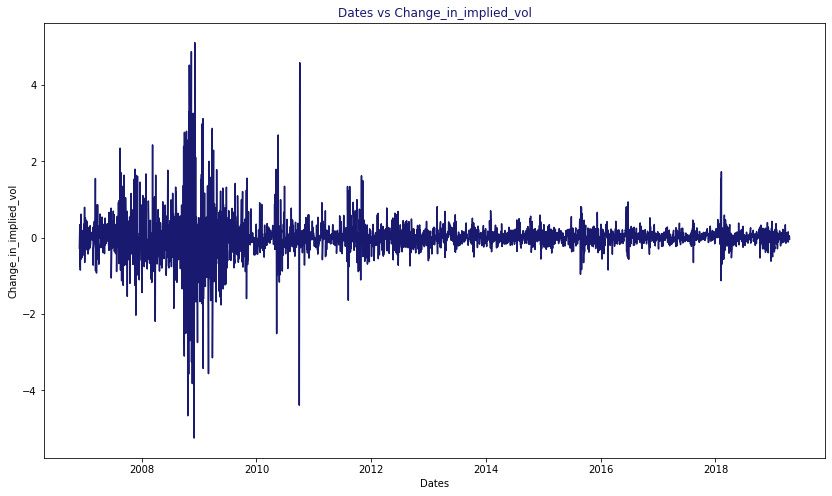

In [45]:
# Try only with one TS 
spx_daily_1Y_100 = spx_daily[(spx_daily.Strike == 100) & (spx_daily.Duration == "1Y")]
graph_df_strike_duration_selection(spx_daily, "1Y", 100, "Dates", "Change_in_implied_vol")

In [46]:
from src.ts_test import test_stationarity

test_stationarity(pd.Series(spx_daily_1Y_100["Change_in_implied_vol"].values))

Results of ADF test: 
Test statistics               -9.728466e+00
P-value                        9.138983e-17
Number of lags used            2.900000e+01
Number of observations used    3.200000e+03
dtype: float64


In [47]:
from statsmodels.tsa.stattools import adfuller

print("Results of ADF test: ")
df_test = adfuller(spx_daily_1Y_100["Change_in_implied_vol"].values, autolag="AIC")
df = pd.Series(df_test[0:4],
               index=["Test statistics", "P-value", "Number of lags used", "Number of observations used"])

df["P-value"] > 0.05

Results of ADF test: 


False

In [49]:
strikes = [40, 60, 80, 90, 100, 110, 120]
durations = ['6M','1Y','18M','2Y','3Y']

for s in strikes: 
    for d in durations:
        df_temp = spx_daily[(spx_daily.Strike == s) & (spx_daily.Duration == d)]
        df_test = adfuller(df_temp["Change_in_implied_vol"].values, autolag="AIC")
        df = pd.Series(df_test[0:4], \
               index=["Test statistics", "P-value", "Number of lags used", "Number of observations used"])

        if (df["P-value"] > 0.05): 
            print(f"ADF test for duration: {d} and strike: {s} shows non-stationarity.")
            print(f"P-value : {df['P-value']}.")
            print()

### Conclusion: 
ADF signifies stationarity for all strike-maturity TS. This is to be reviewed as variance changes.

## Autocorrelation - ACF and PACF plots

Strike: 40, Maturity: 6M


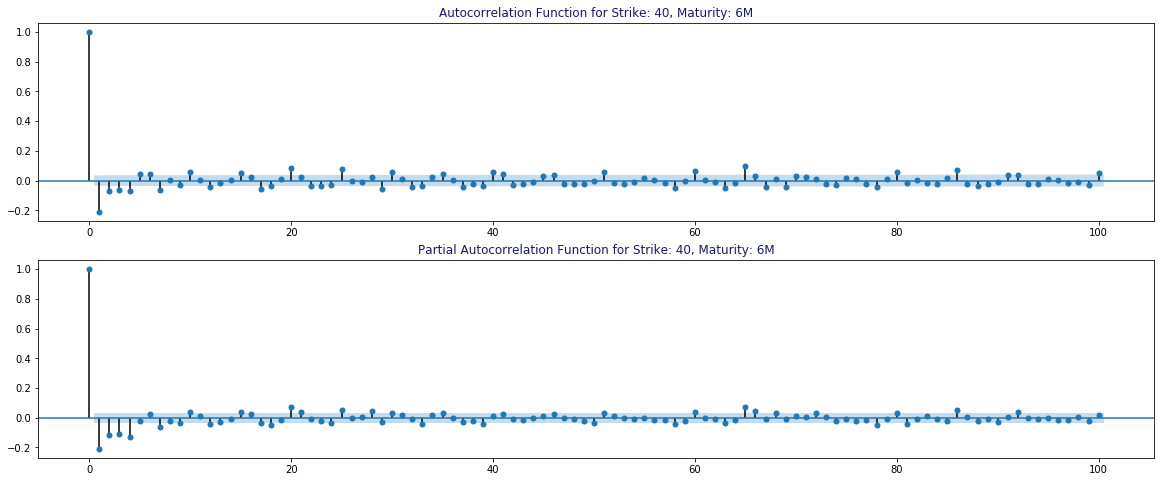

Strike: 40, Maturity: 1Y


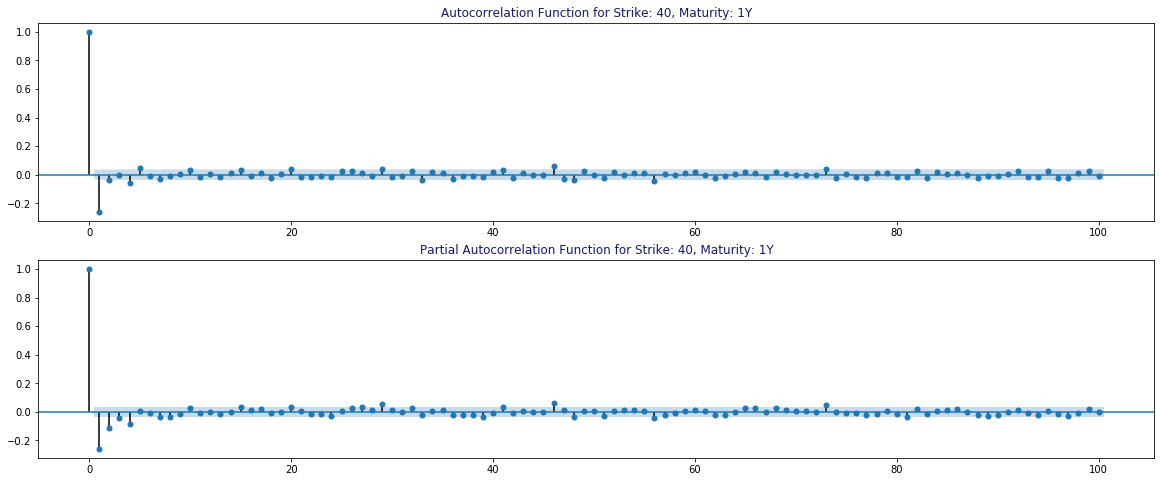

Strike: 40, Maturity: 18M


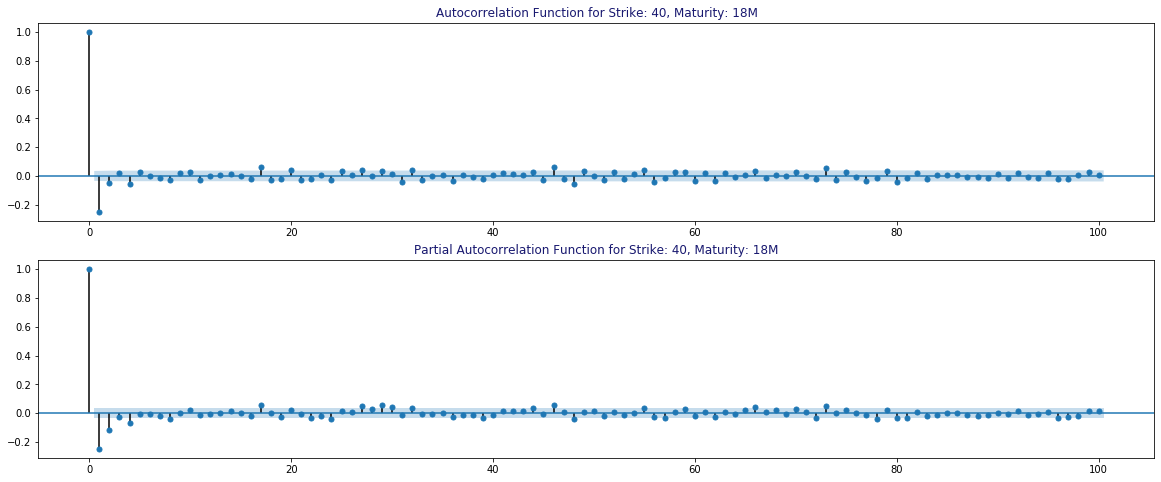

Strike: 40, Maturity: 2Y


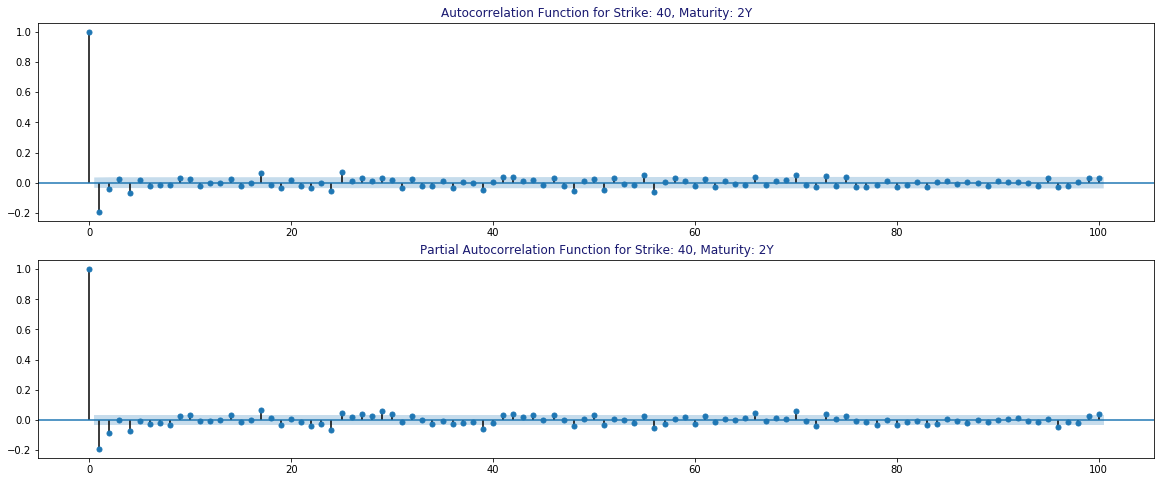

Strike: 40, Maturity: 3Y


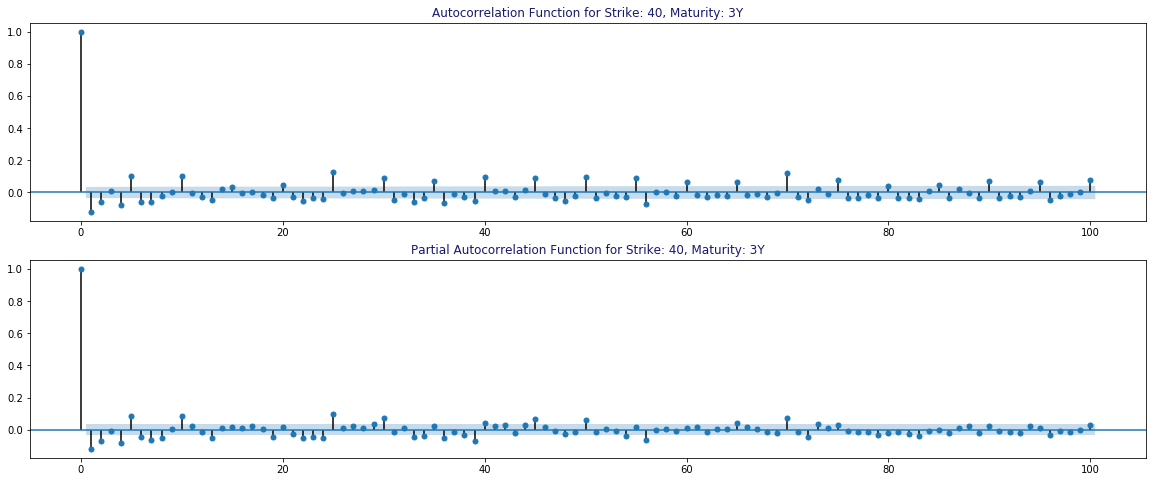

Strike: 60, Maturity: 6M


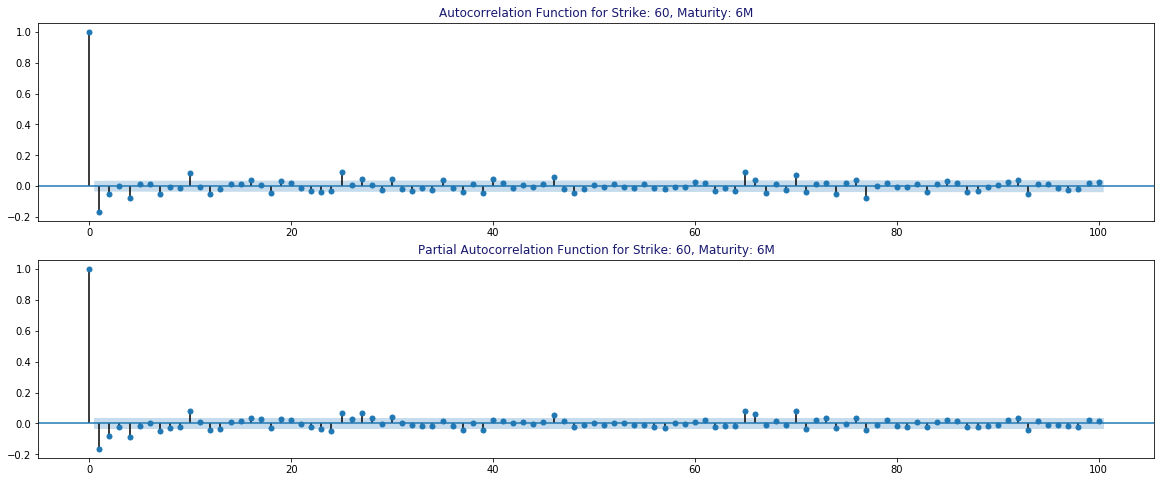

Strike: 60, Maturity: 1Y


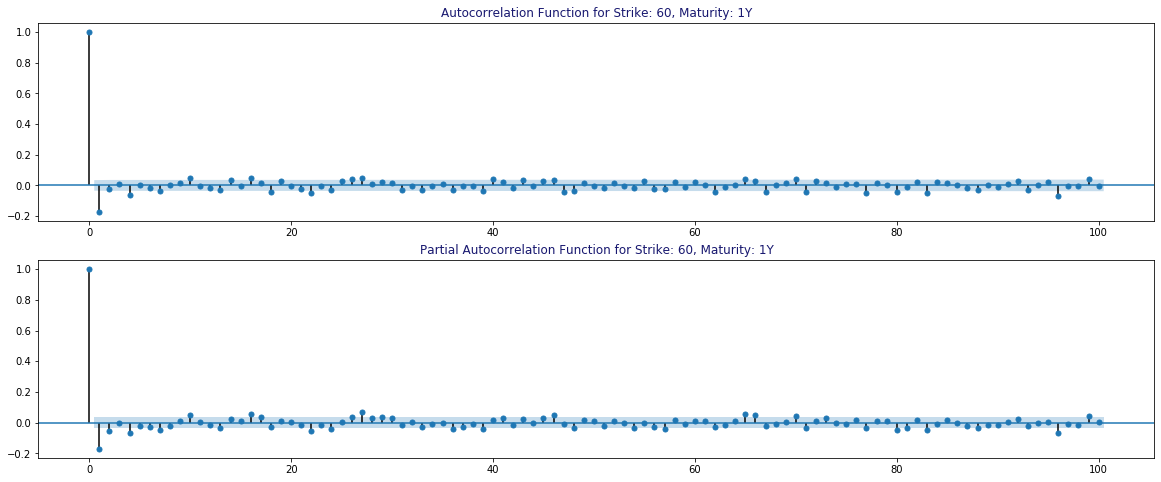

Strike: 60, Maturity: 18M


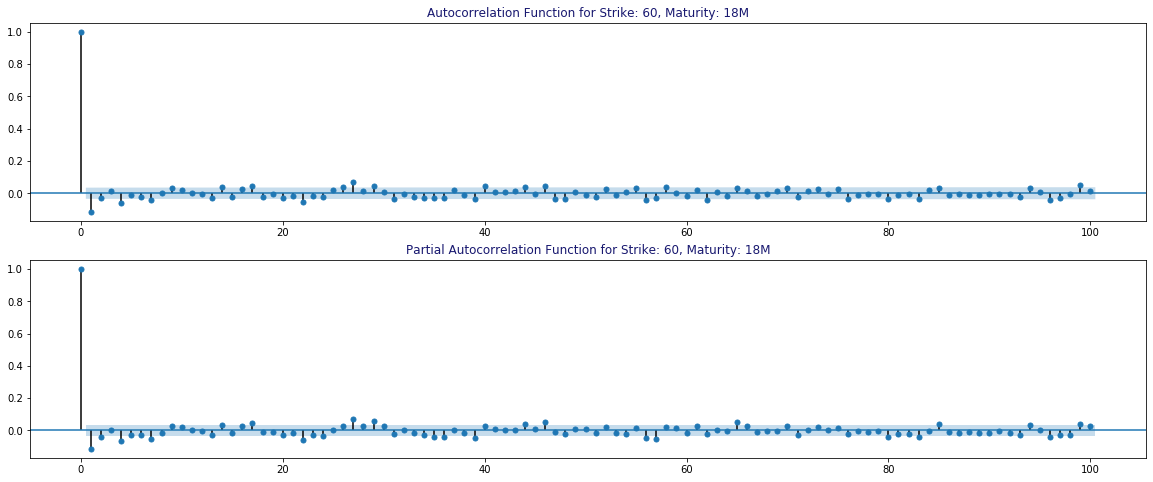

Strike: 60, Maturity: 2Y


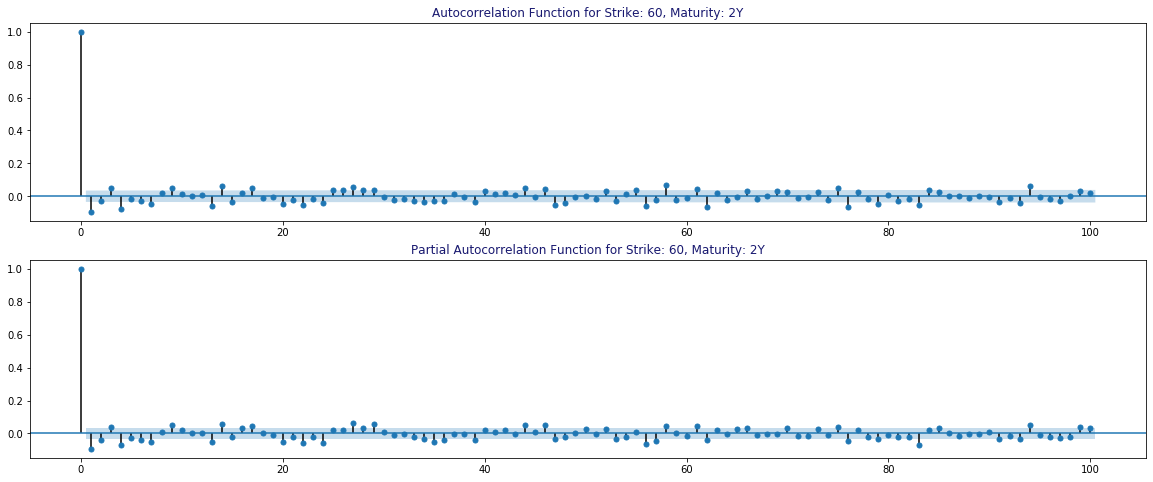

Strike: 60, Maturity: 3Y


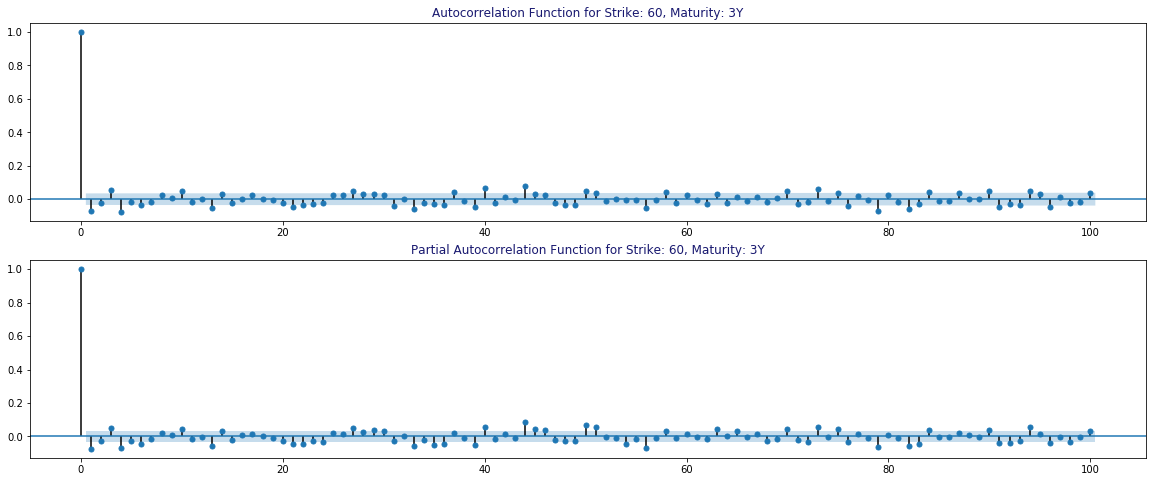

Strike: 80, Maturity: 6M


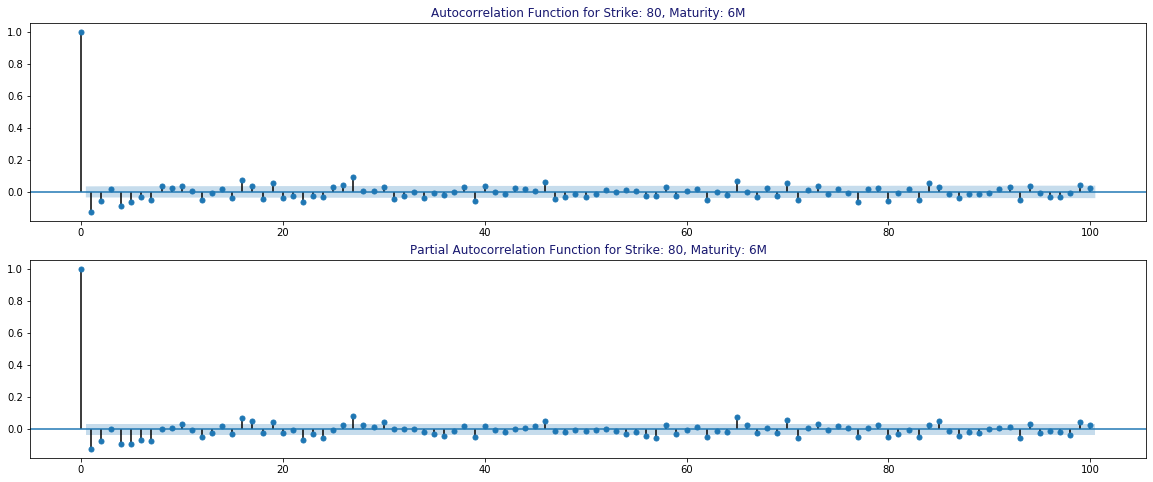

Strike: 80, Maturity: 1Y


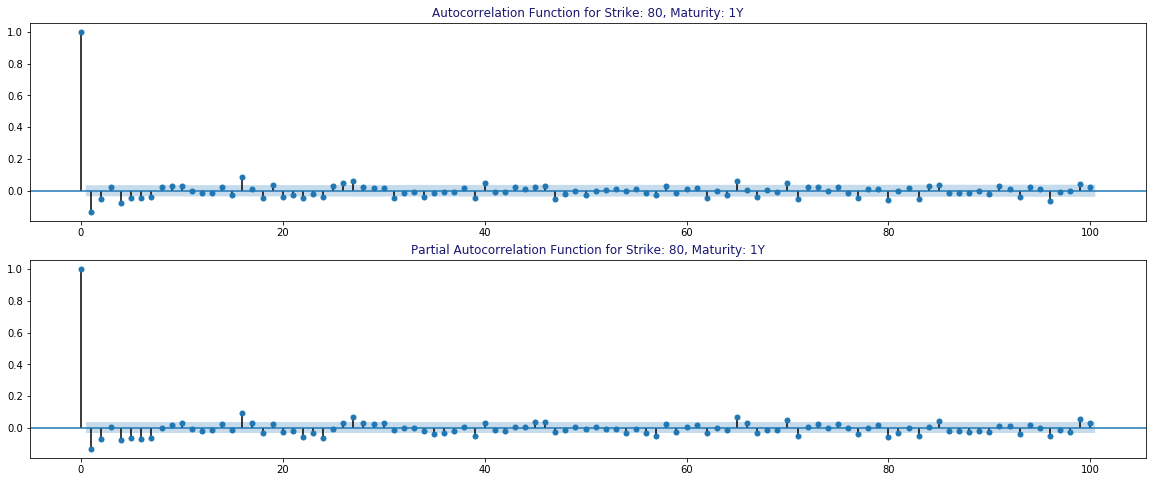

Strike: 80, Maturity: 18M


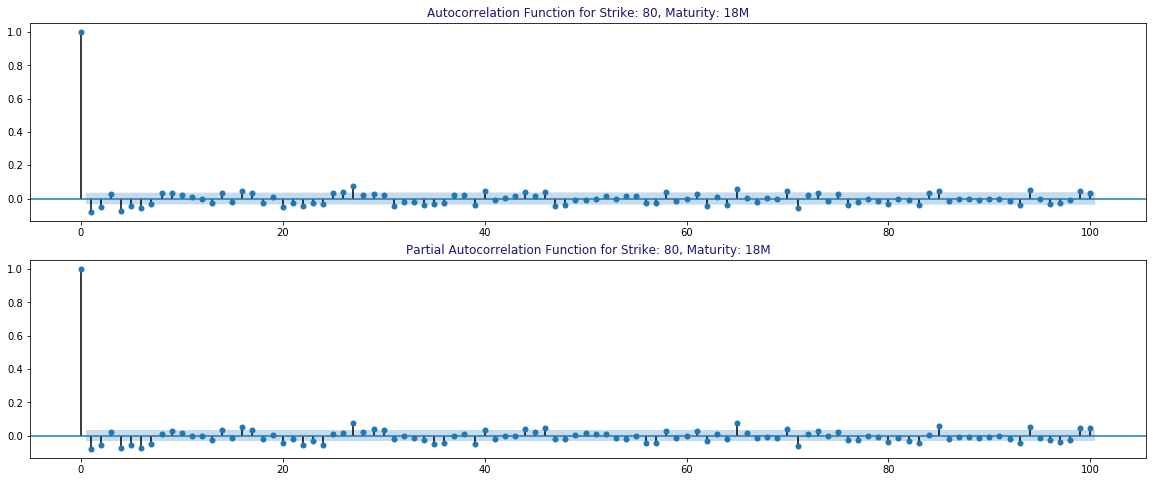

Strike: 80, Maturity: 2Y


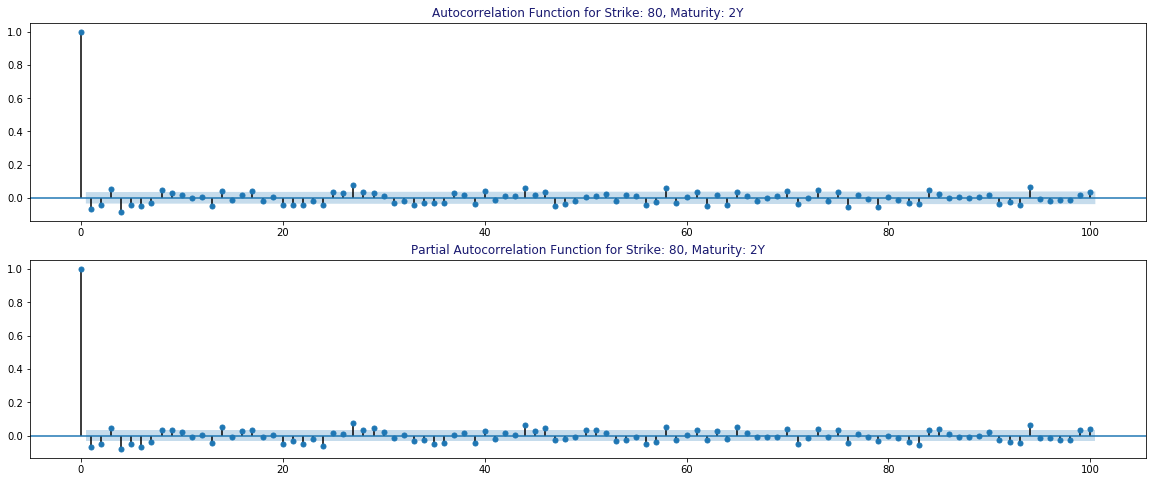

Strike: 80, Maturity: 3Y


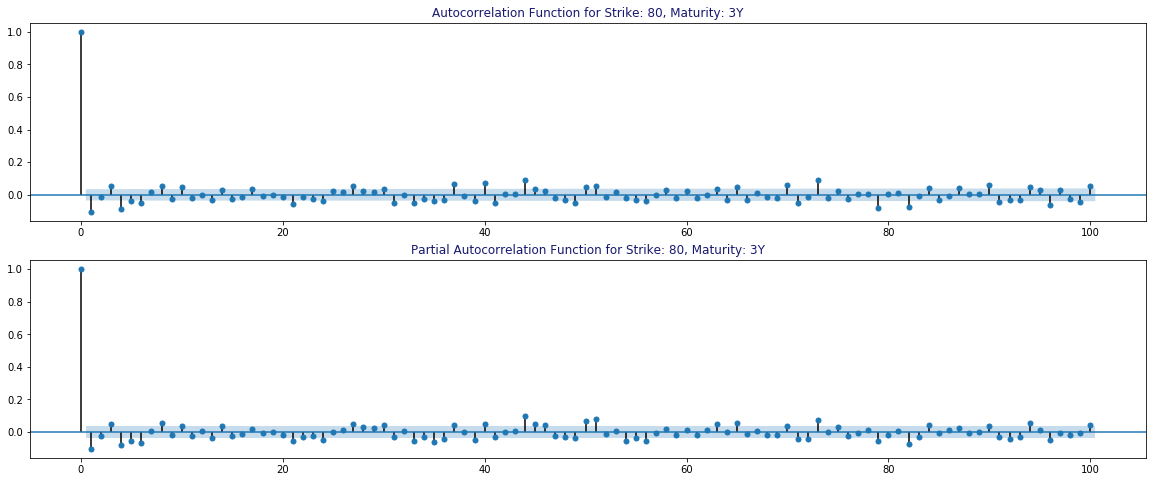

Strike: 90, Maturity: 6M


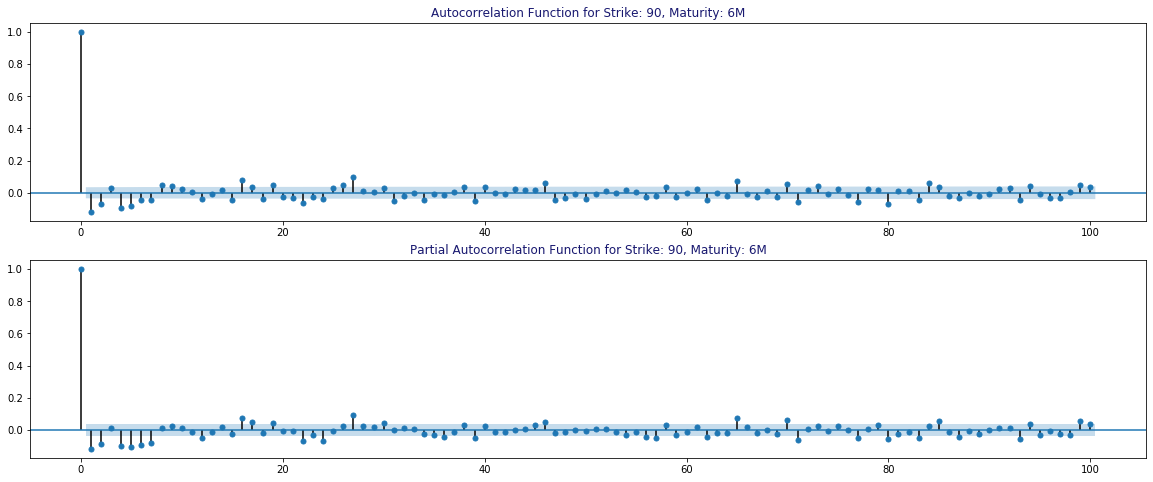

Strike: 90, Maturity: 1Y


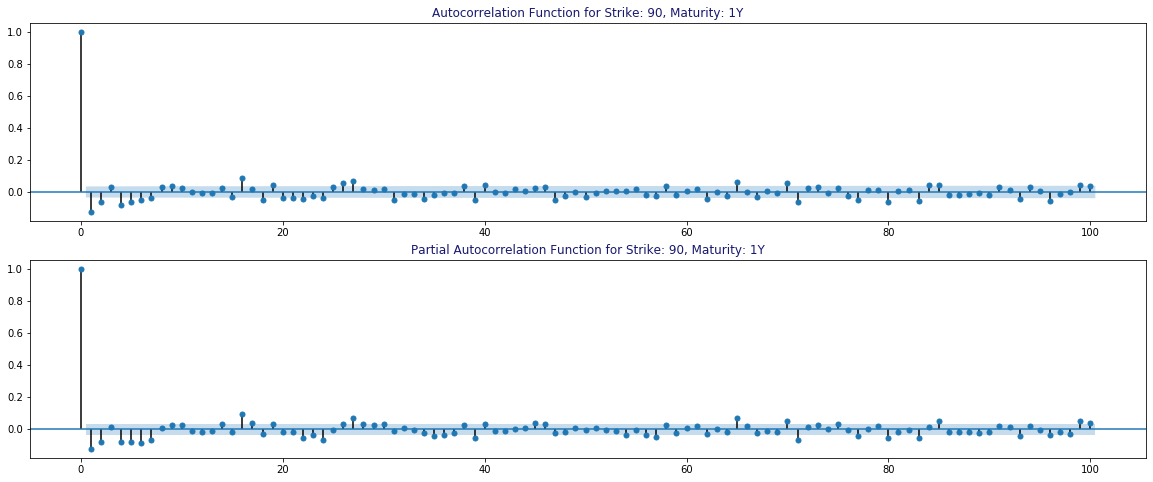

Strike: 90, Maturity: 18M


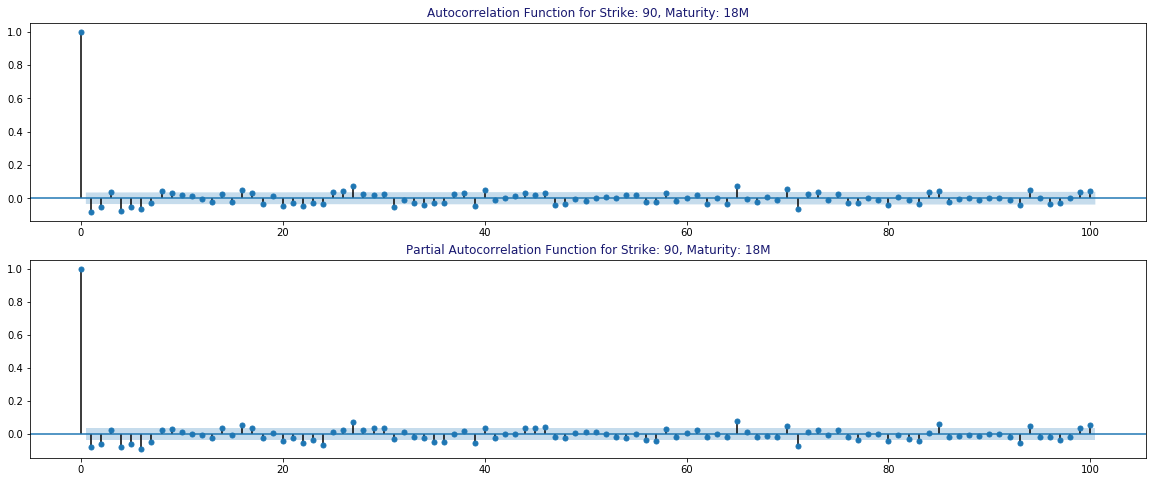

Strike: 90, Maturity: 2Y


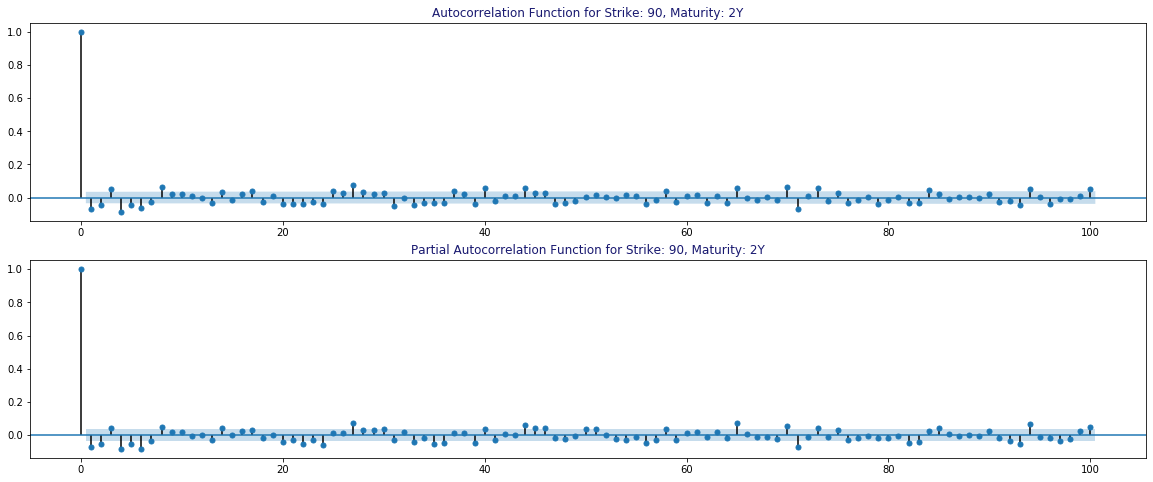

Strike: 90, Maturity: 3Y


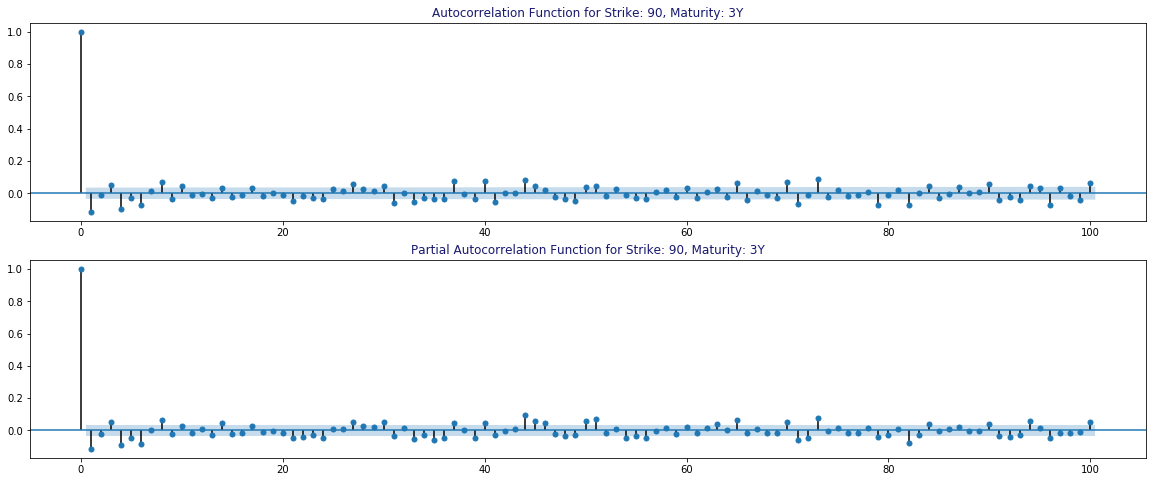

Strike: 100, Maturity: 6M


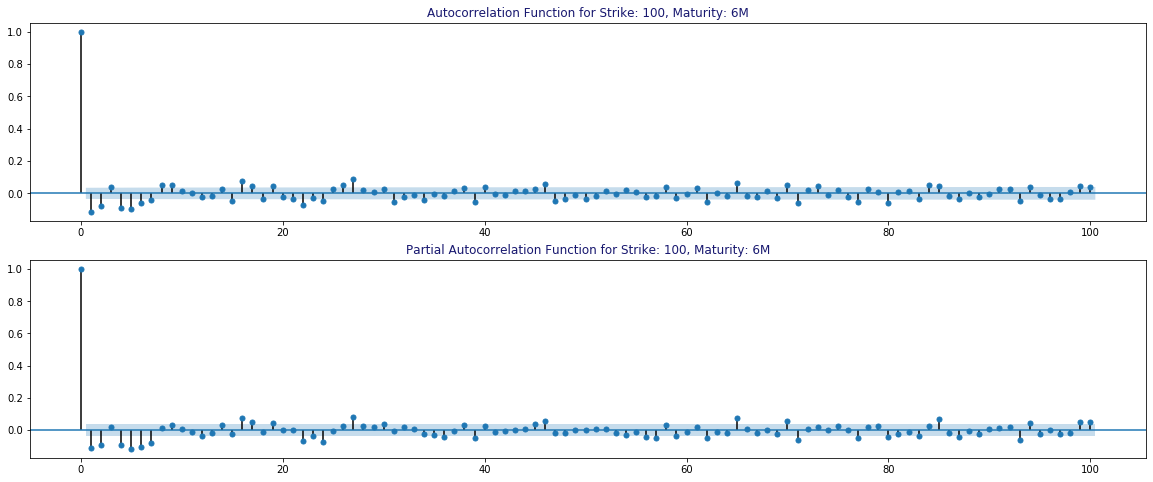

Strike: 100, Maturity: 1Y


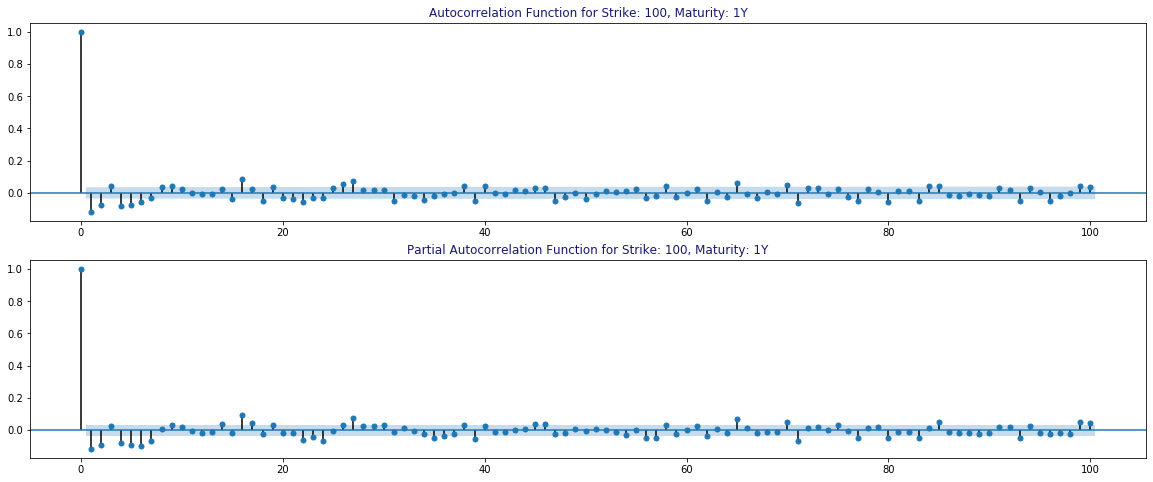

Strike: 100, Maturity: 18M


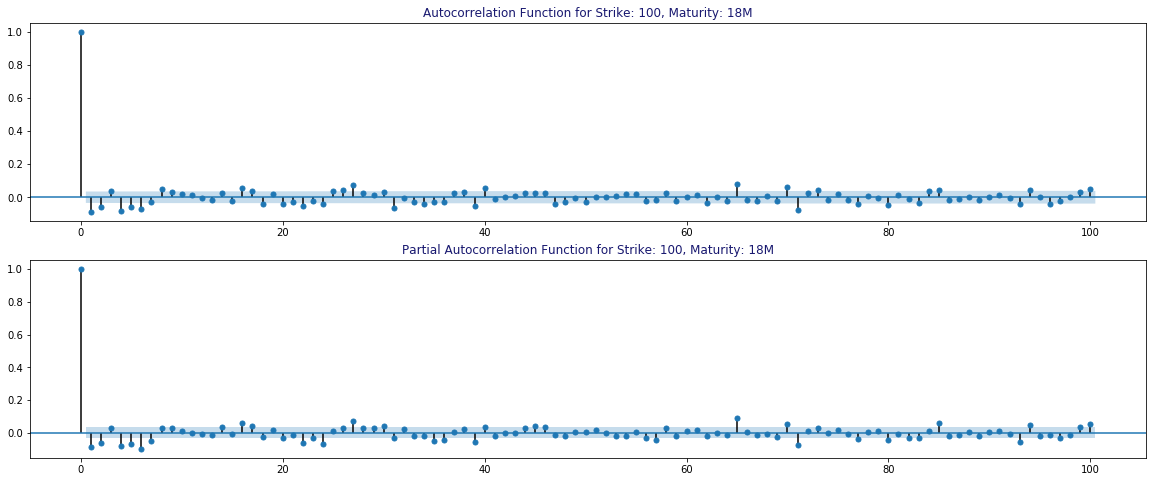

Strike: 100, Maturity: 2Y


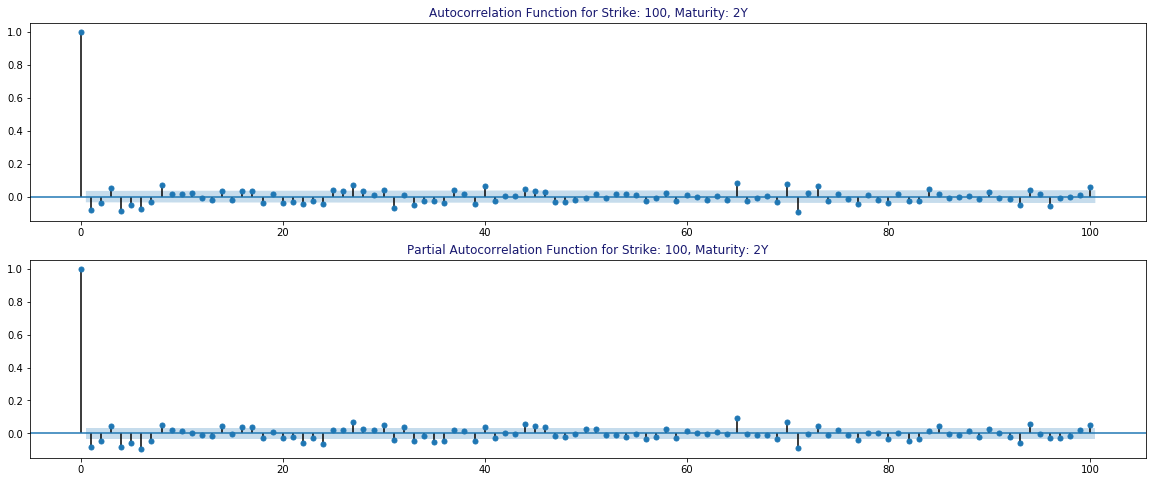

Strike: 100, Maturity: 3Y


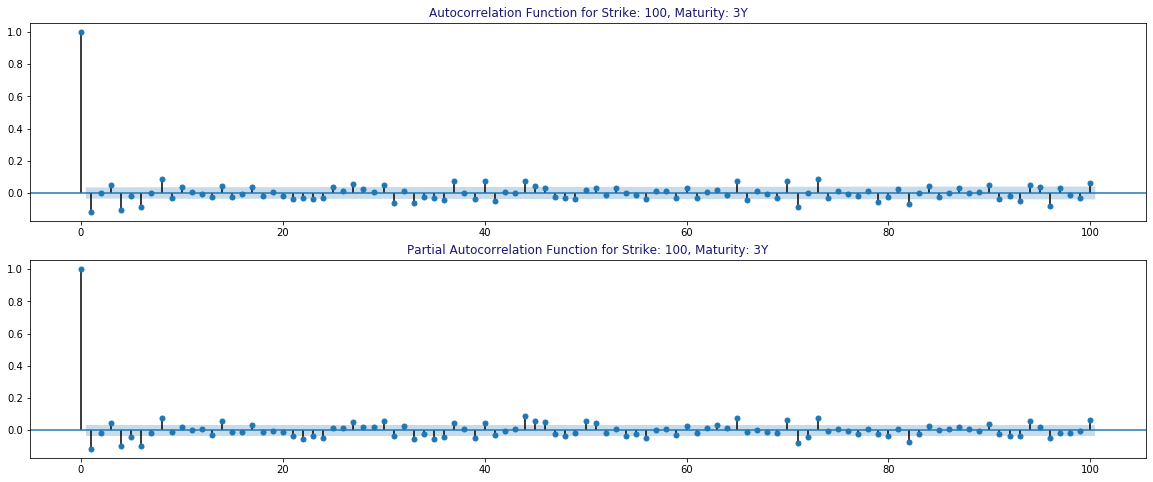

Strike: 110, Maturity: 6M


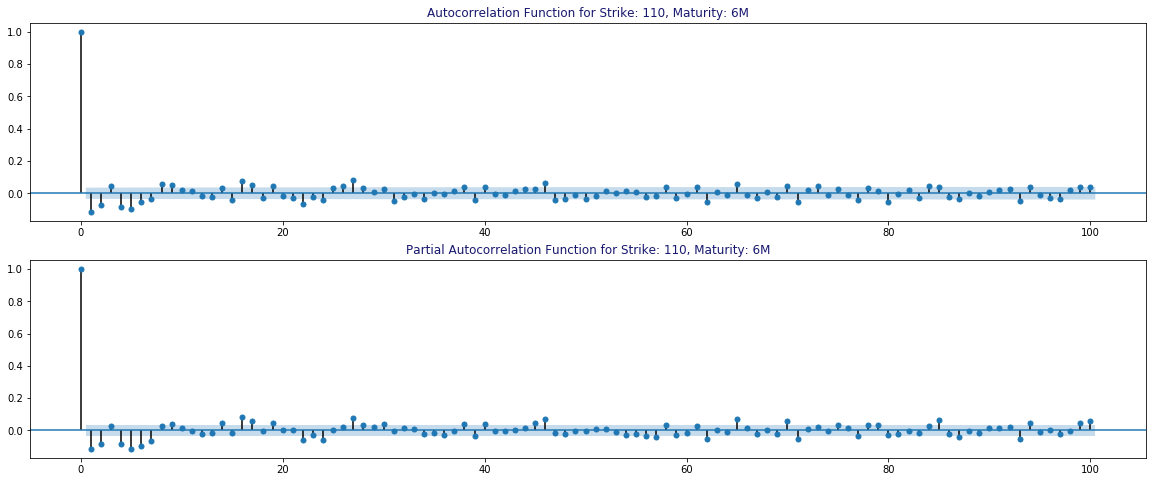

Strike: 110, Maturity: 1Y


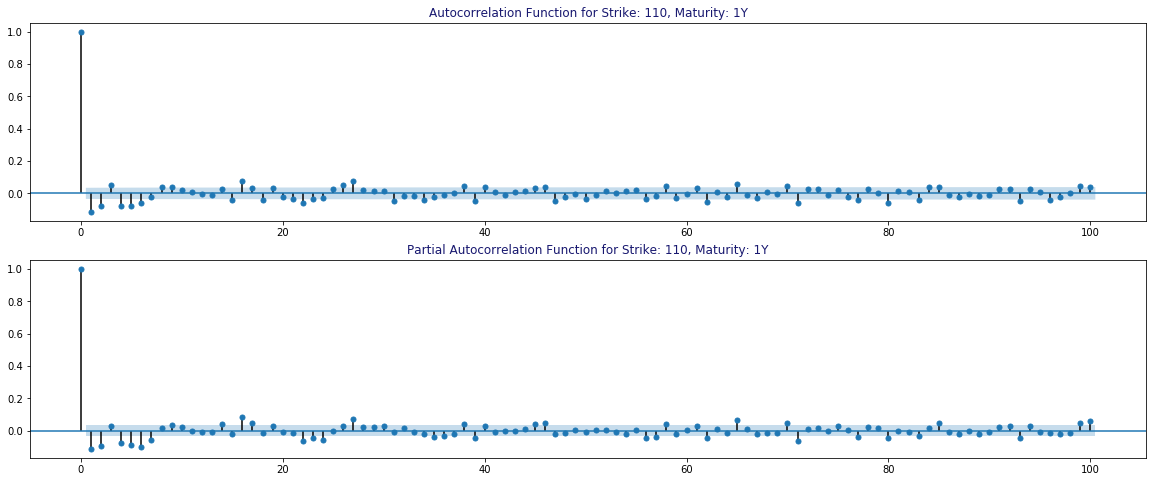

Strike: 110, Maturity: 18M


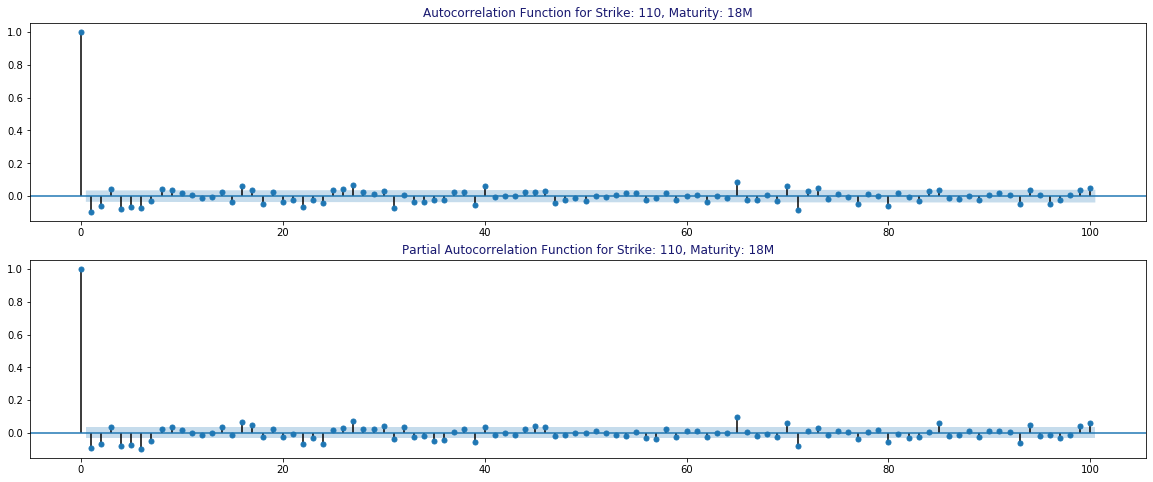

Strike: 110, Maturity: 2Y


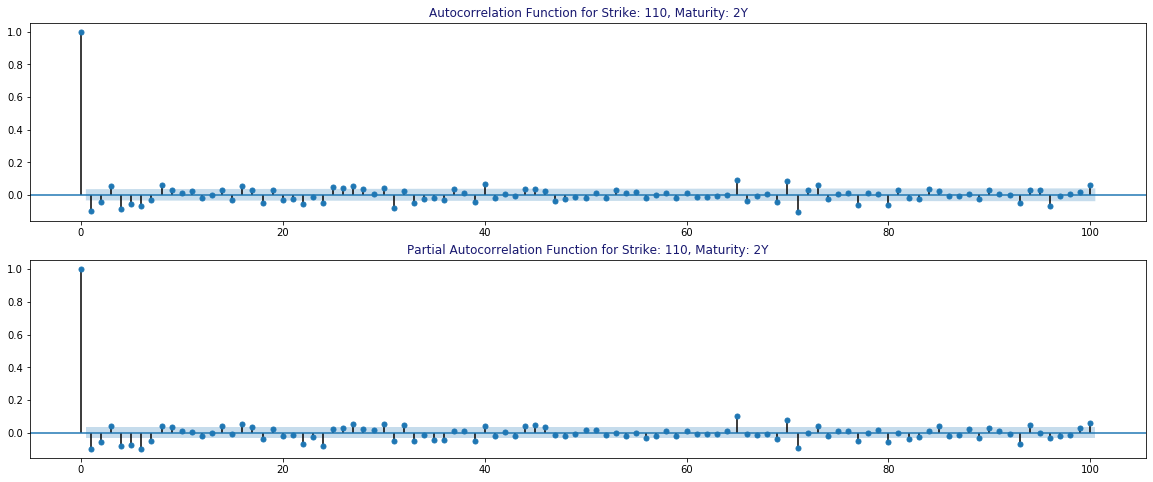

Strike: 110, Maturity: 3Y


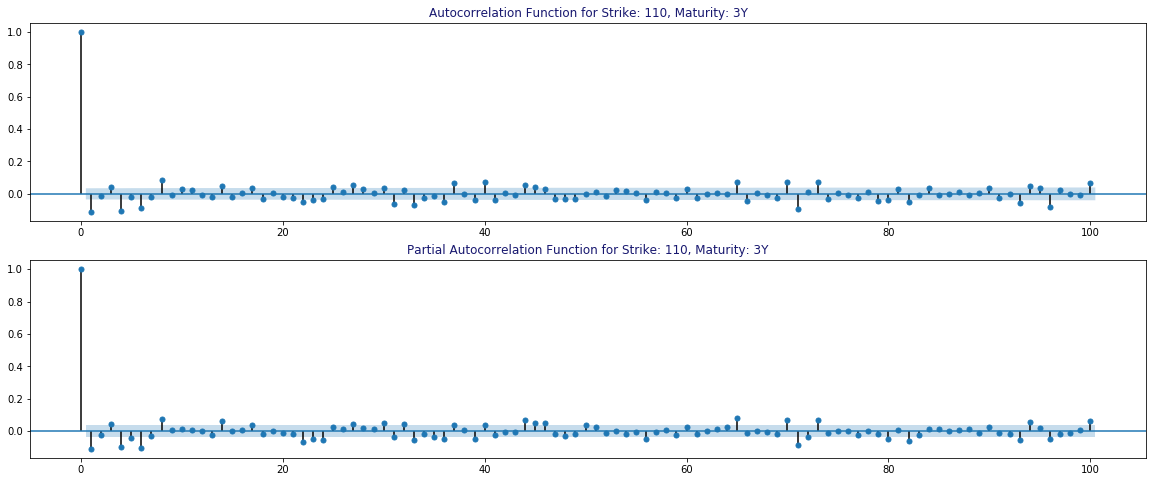

Strike: 120, Maturity: 6M


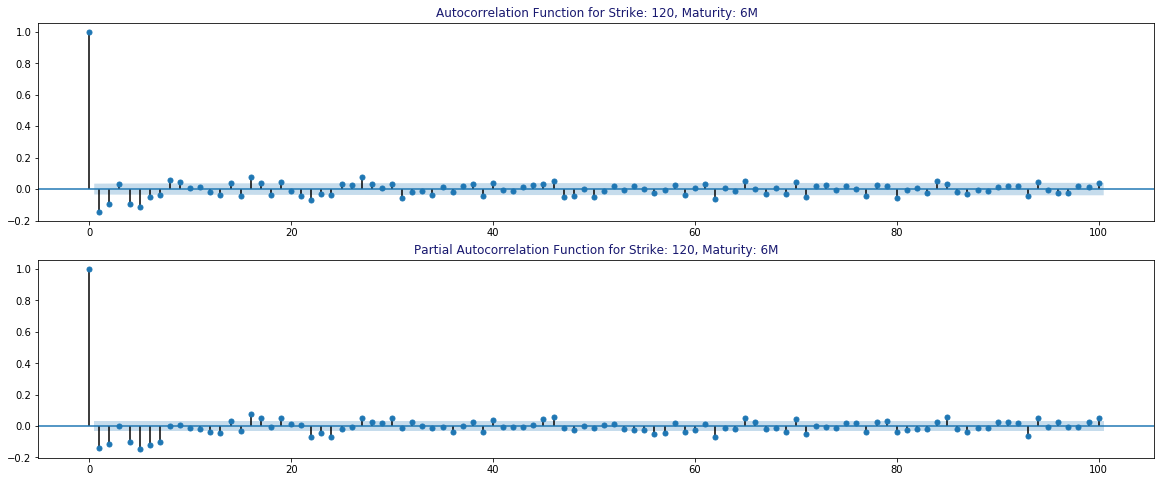

Strike: 120, Maturity: 1Y


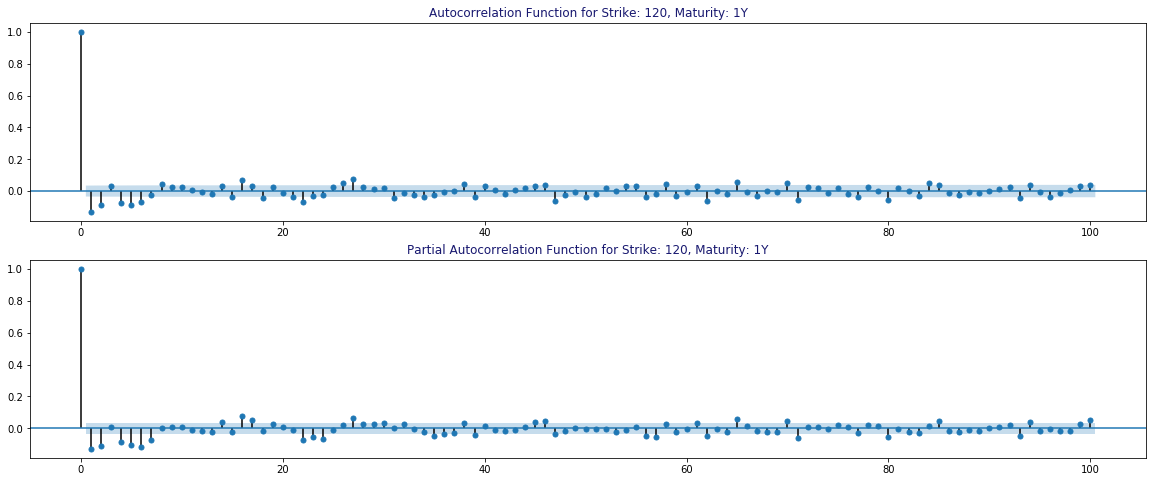

Strike: 120, Maturity: 18M


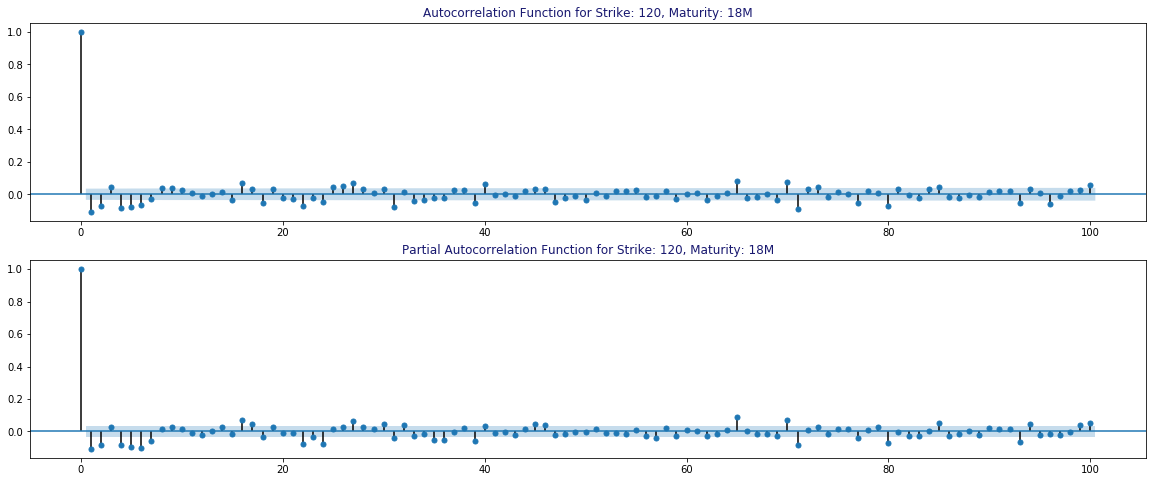

Strike: 120, Maturity: 2Y


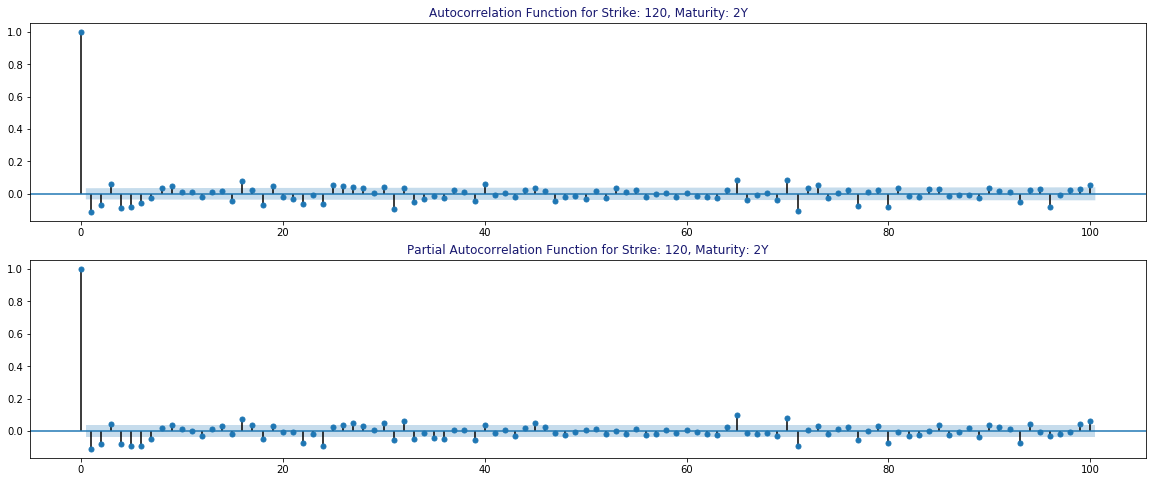

Strike: 120, Maturity: 3Y


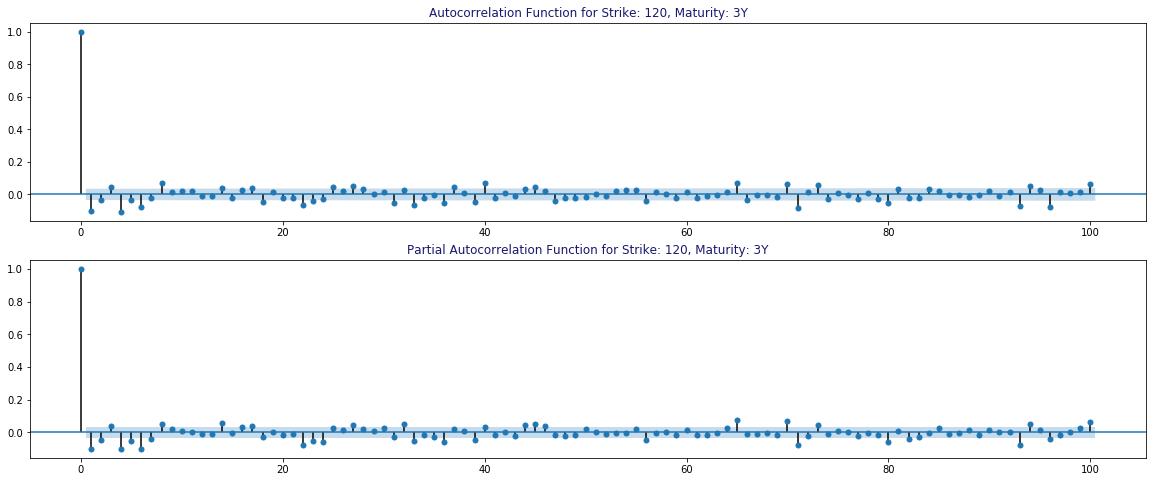

In [56]:
from src.ts_test import acf_pacf_plots

acf_pacf_plots(spx_daily)

### Conclusion: 
High lags of correlation.


# Moving averages 

See how moving averages can help to see the underlying trend. Graph change_in_implied_vol and its smoothed version. 

### Rolling mean and std 

Rolling mean and std for maturity: 6M and strike: 40


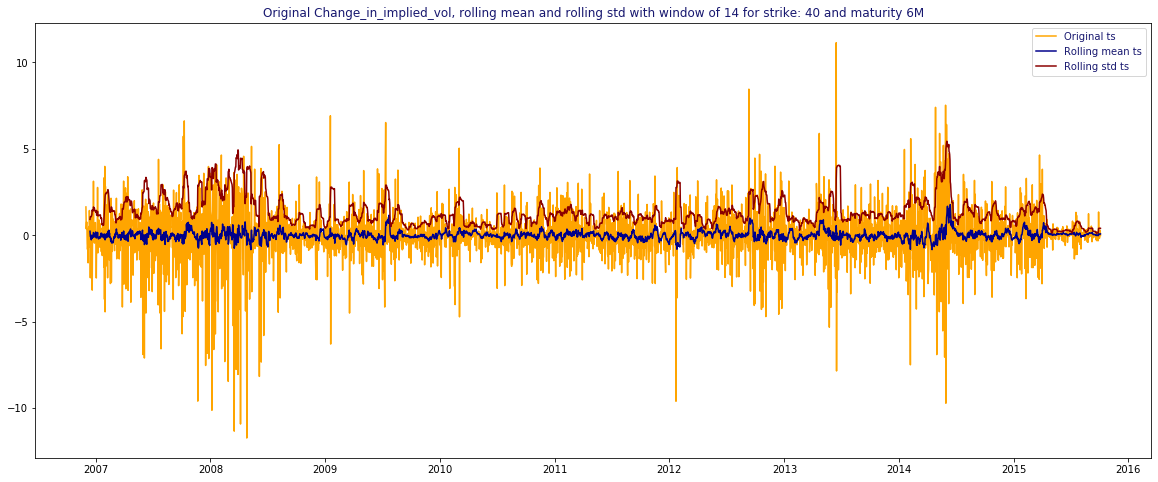

Rolling mean and std for maturity: 1Y and strike: 40


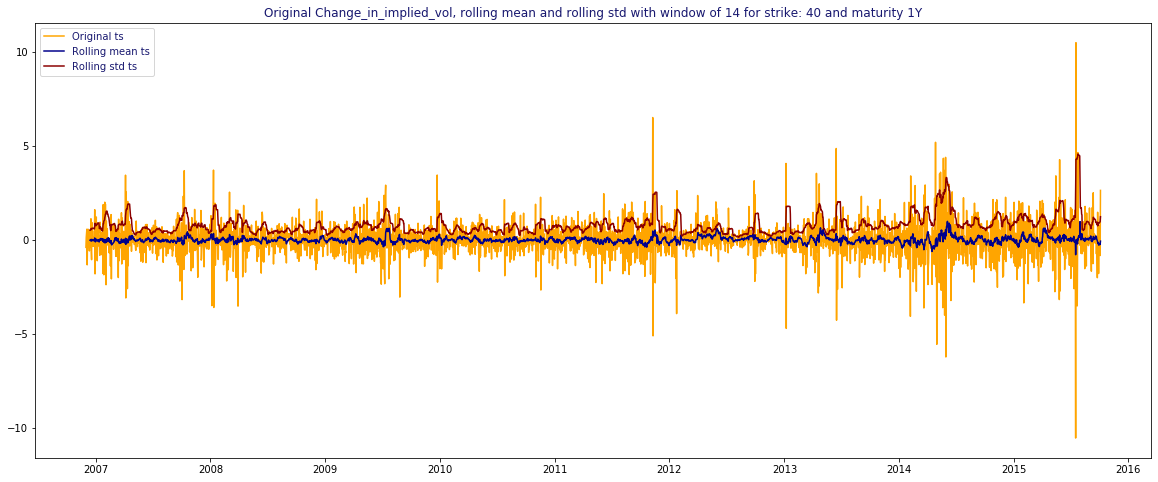

Rolling mean and std for maturity: 18M and strike: 40


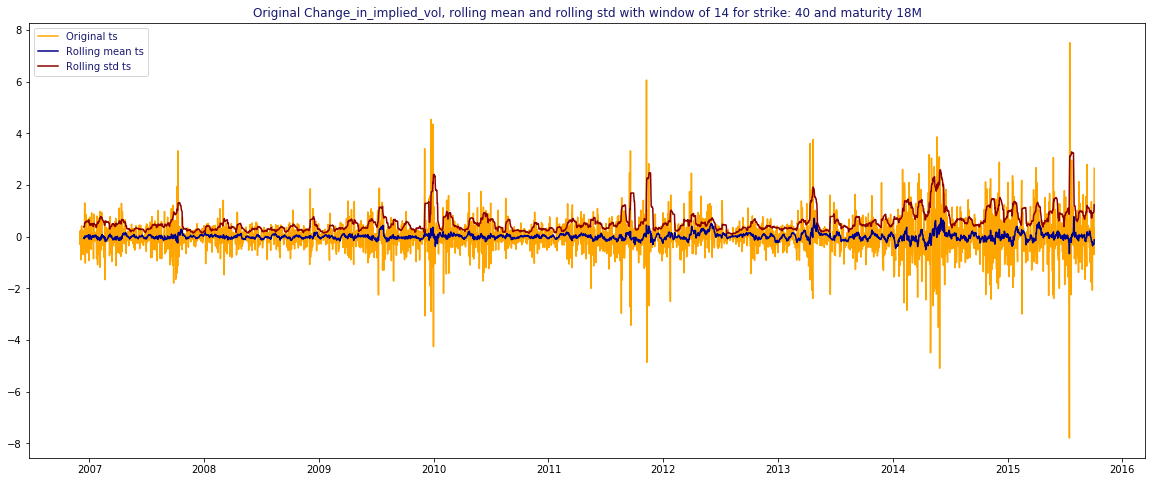

Rolling mean and std for maturity: 2Y and strike: 40


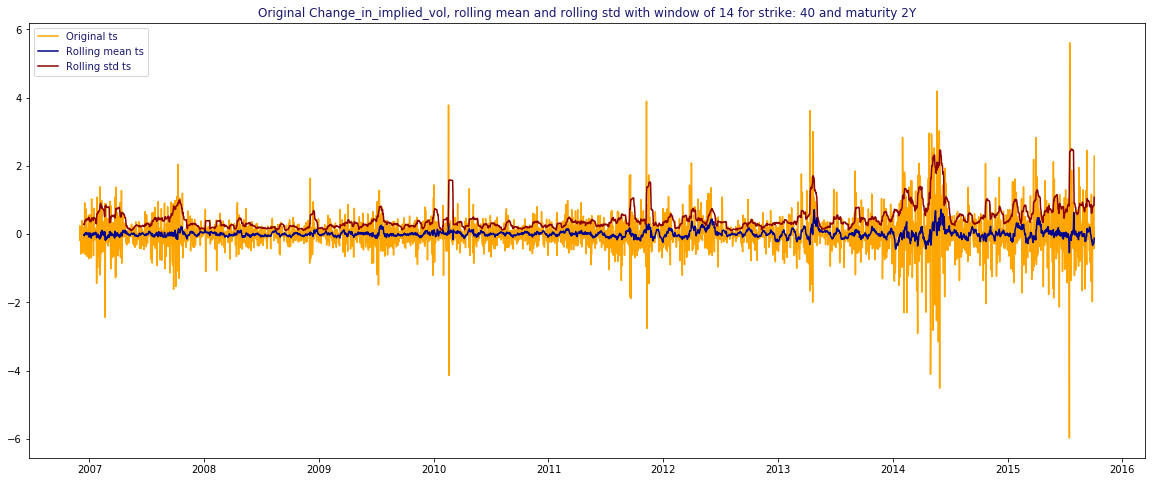

Rolling mean and std for maturity: 3Y and strike: 40


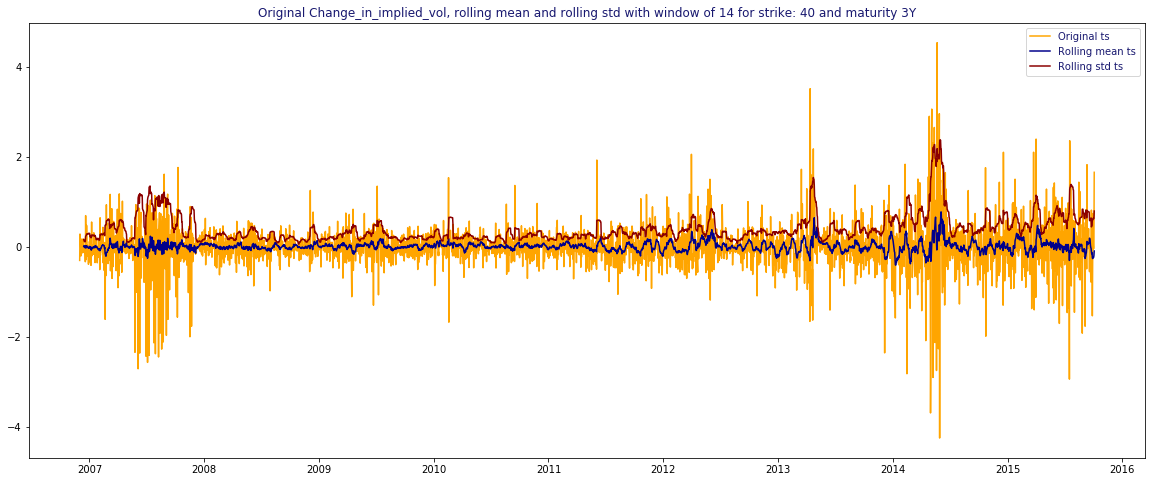

Rolling mean and std for maturity: 6M and strike: 60


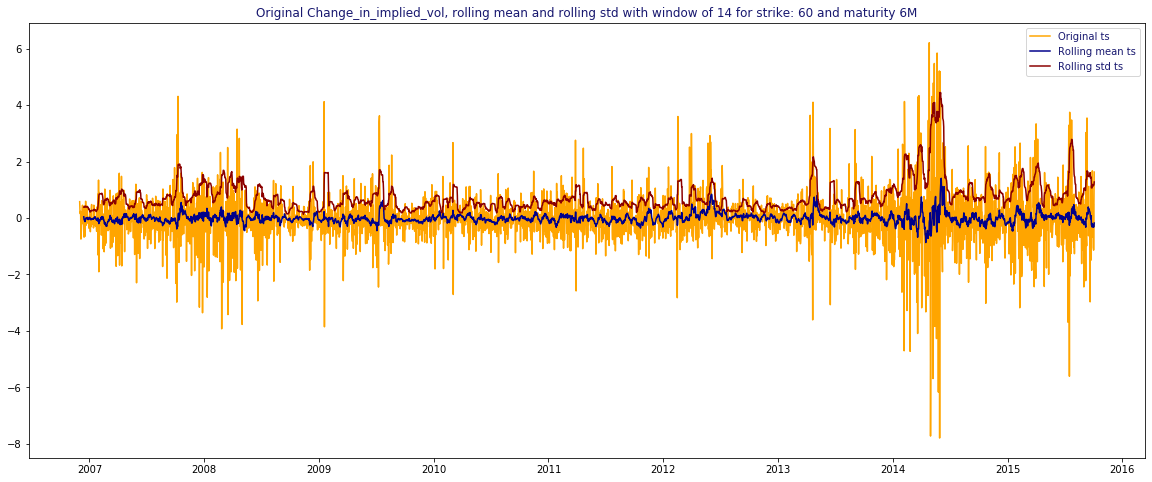

Rolling mean and std for maturity: 1Y and strike: 60


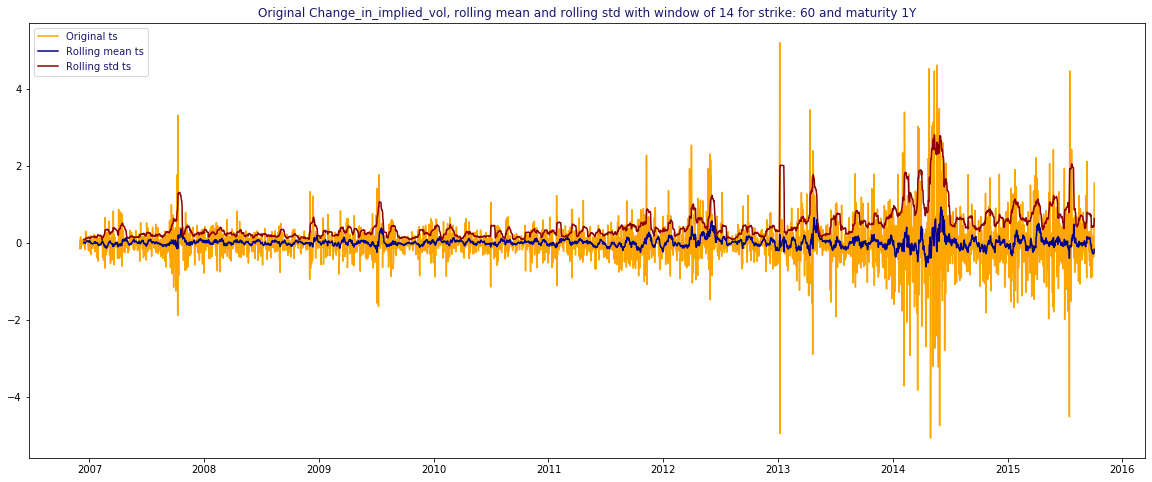

Rolling mean and std for maturity: 18M and strike: 60


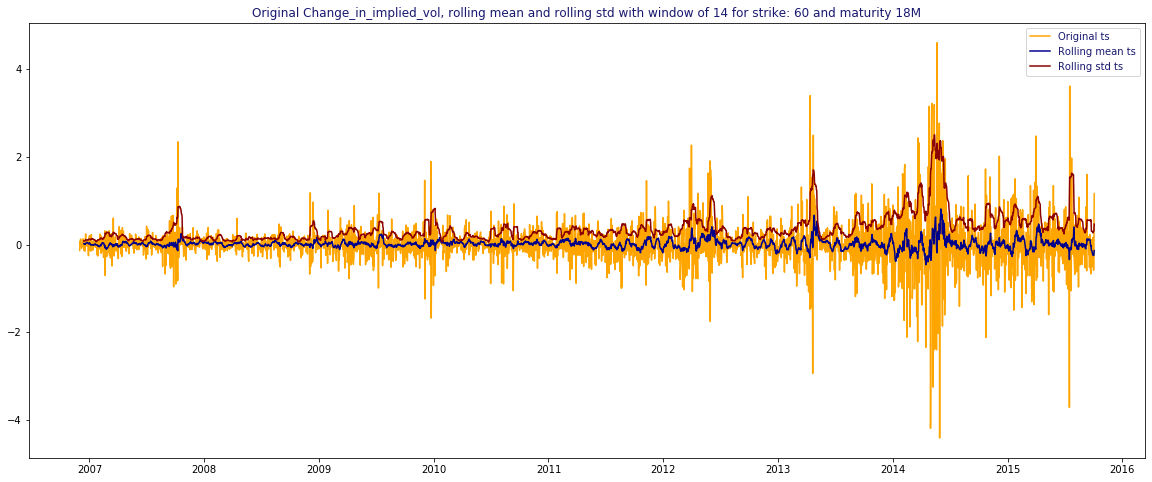

Rolling mean and std for maturity: 2Y and strike: 60


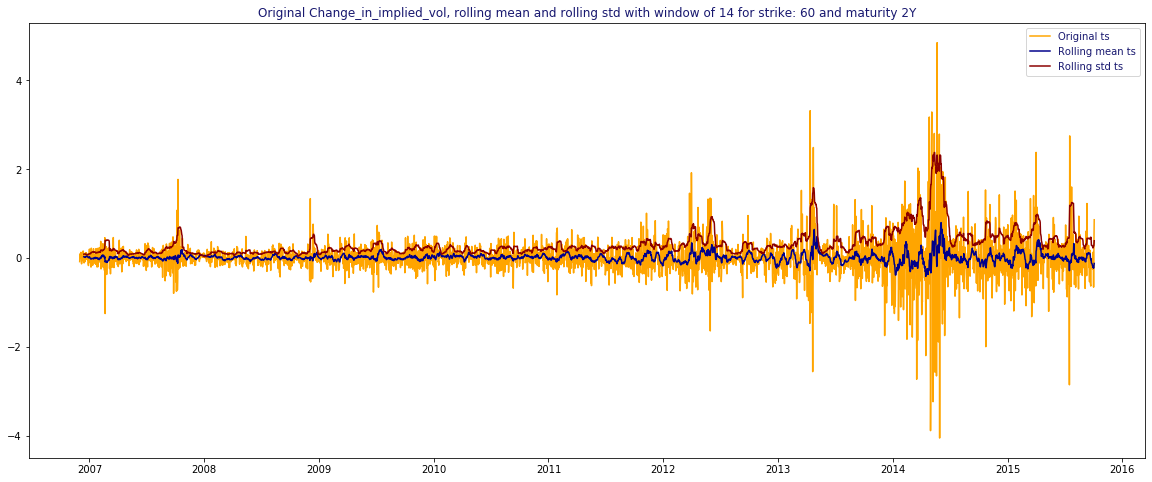

Rolling mean and std for maturity: 3Y and strike: 60


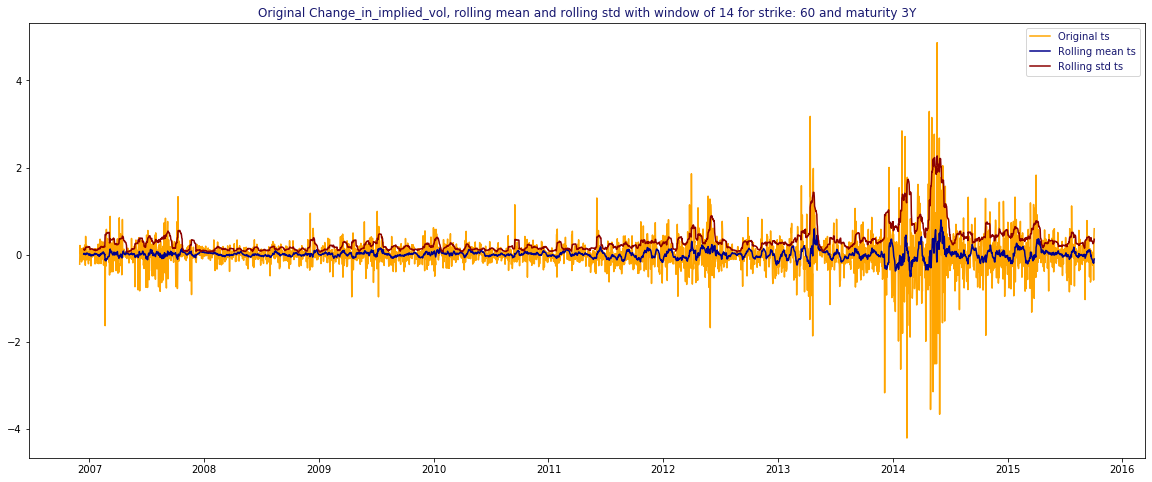

Rolling mean and std for maturity: 6M and strike: 80


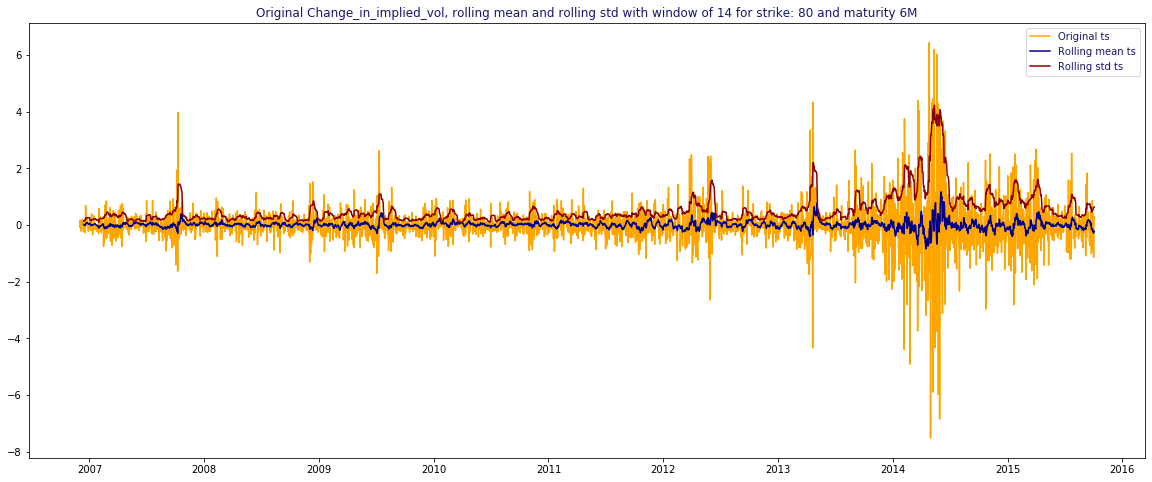

Rolling mean and std for maturity: 1Y and strike: 80


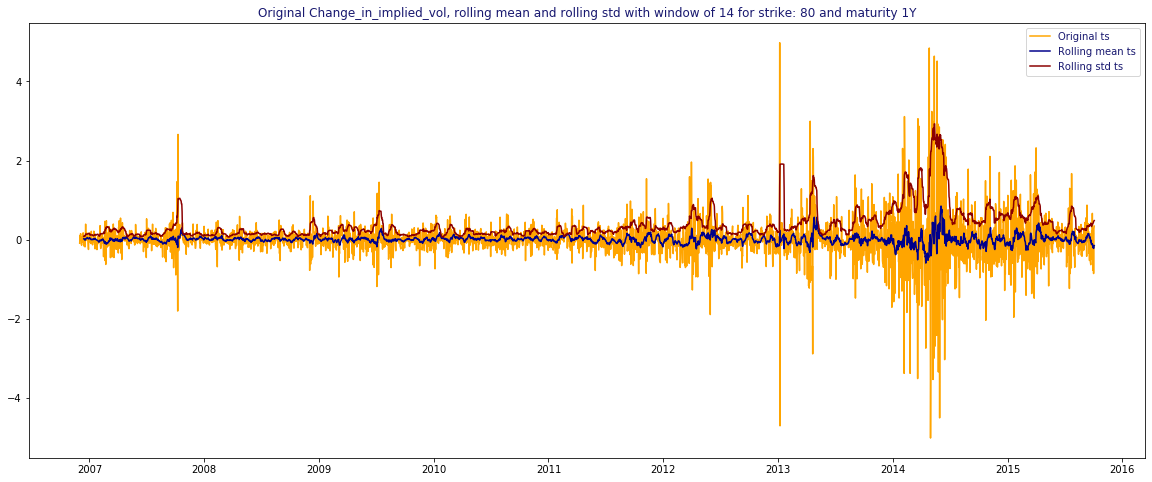

Rolling mean and std for maturity: 18M and strike: 80


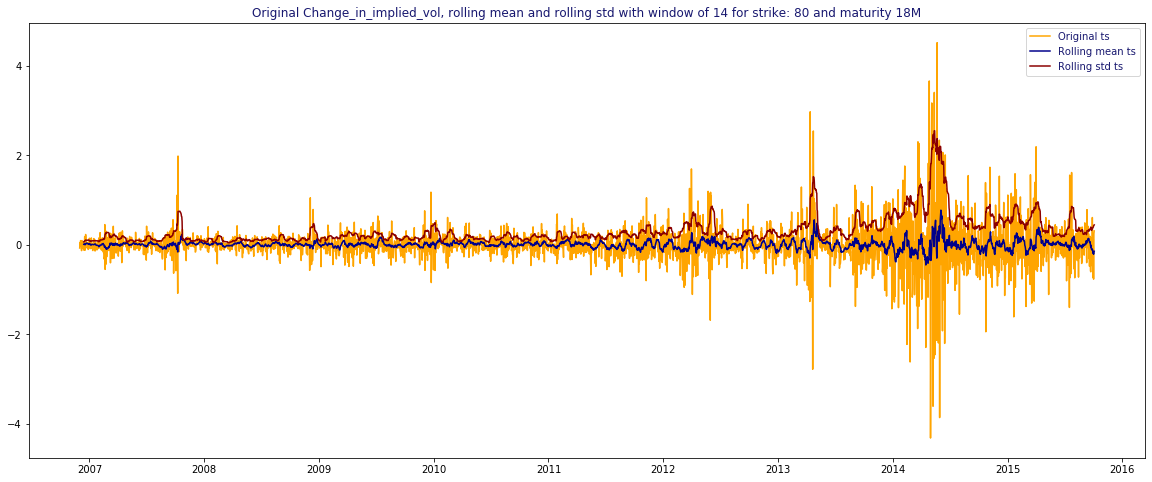

Rolling mean and std for maturity: 2Y and strike: 80


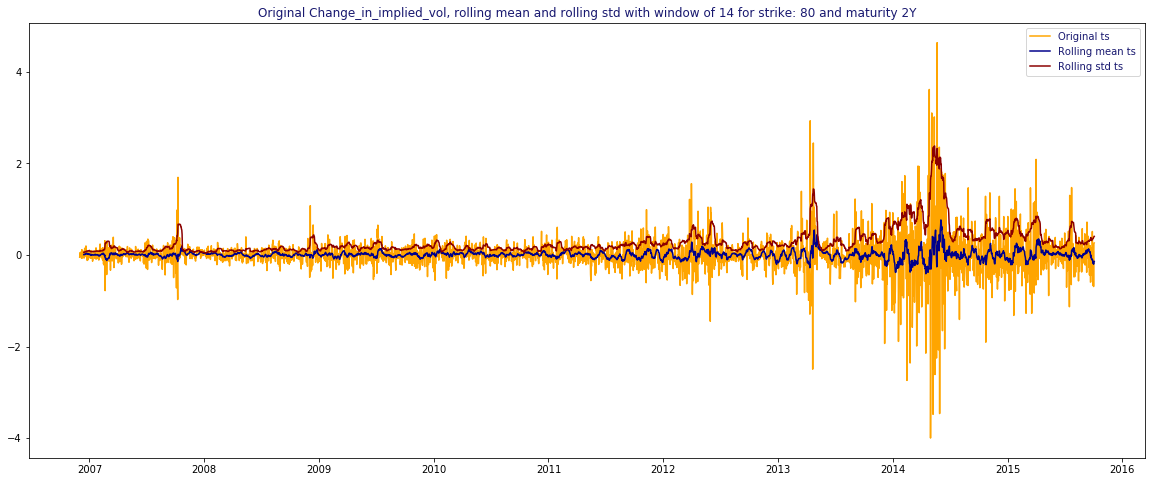

Rolling mean and std for maturity: 3Y and strike: 80


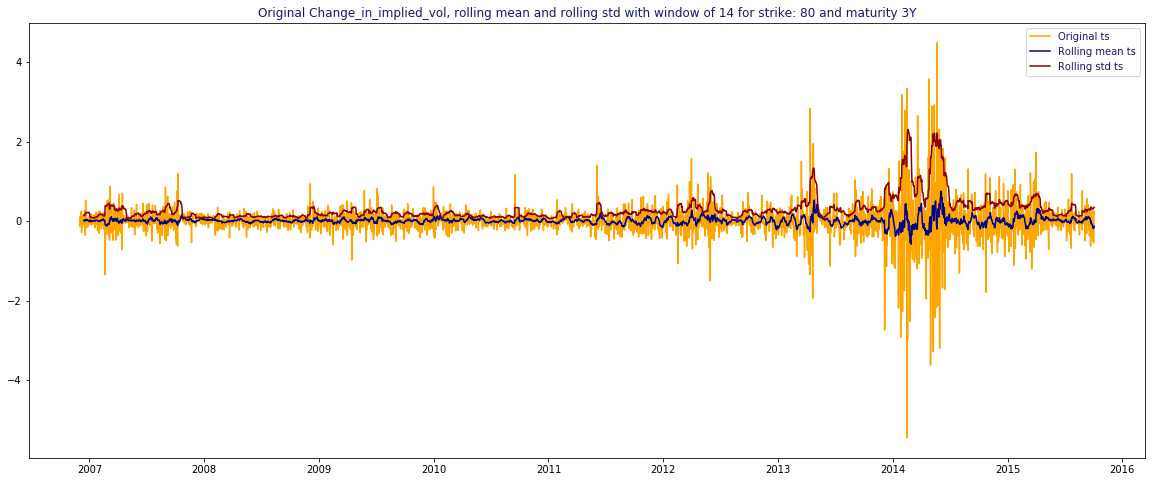

Rolling mean and std for maturity: 6M and strike: 90


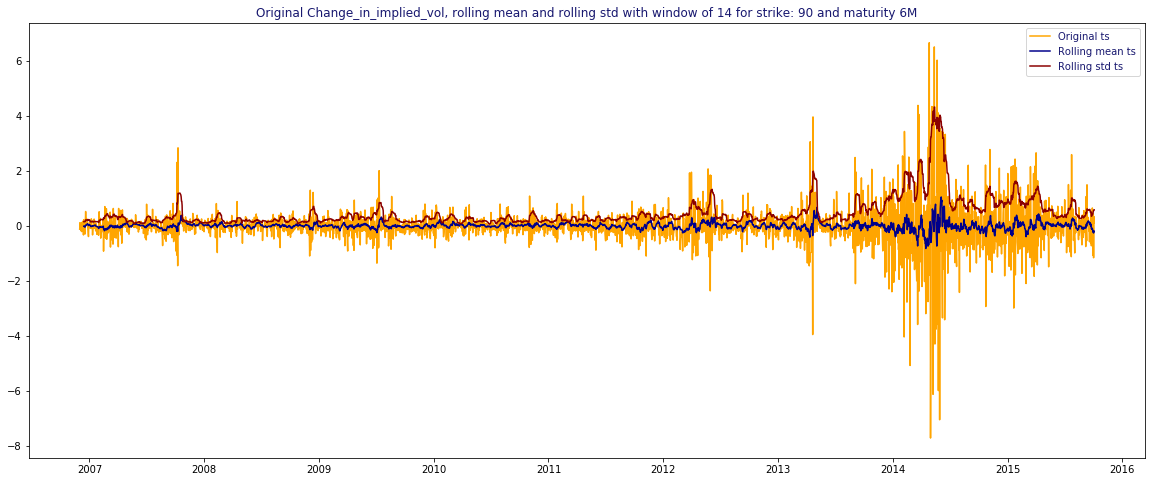

Rolling mean and std for maturity: 1Y and strike: 90


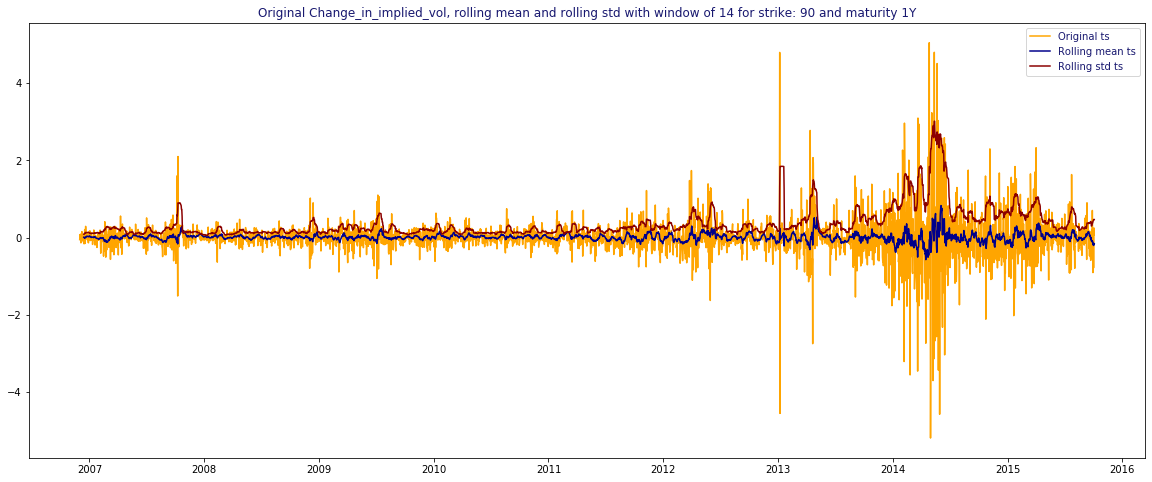

Rolling mean and std for maturity: 18M and strike: 90


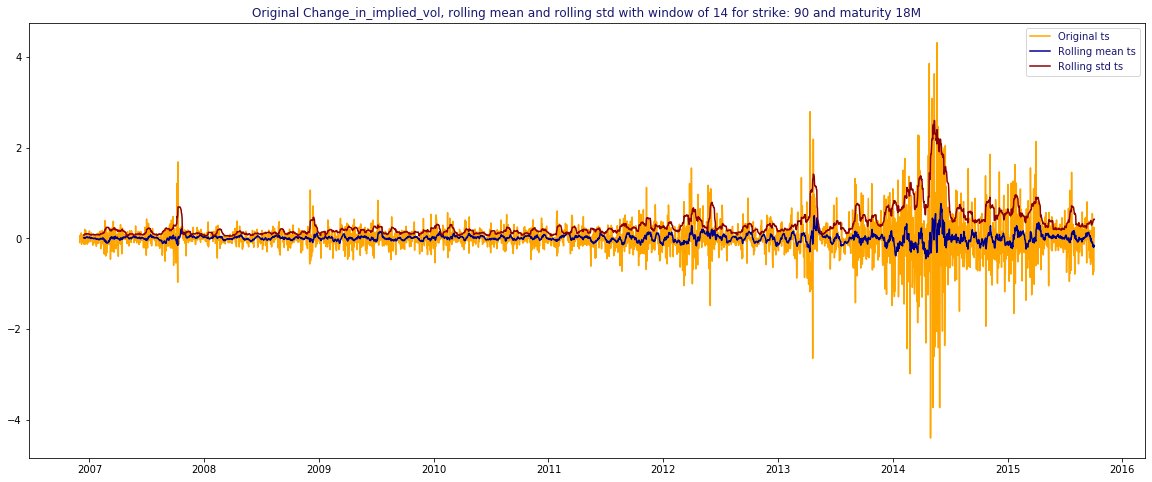

Rolling mean and std for maturity: 2Y and strike: 90


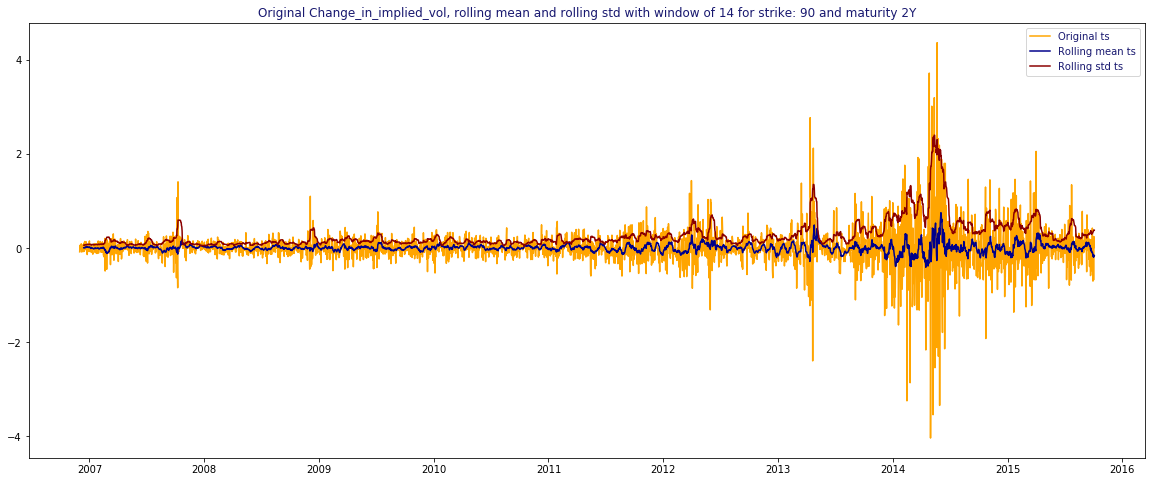

Rolling mean and std for maturity: 3Y and strike: 90


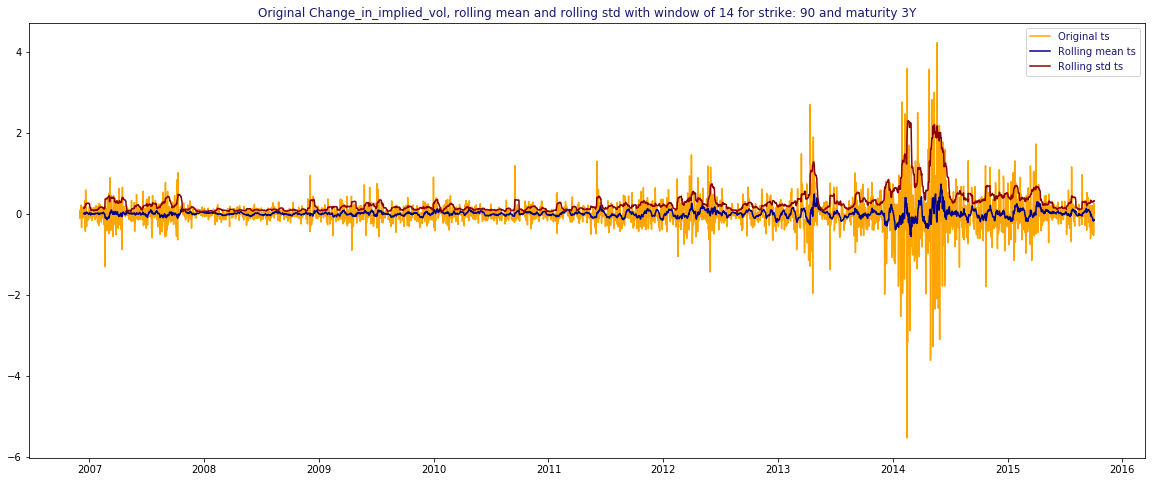

Rolling mean and std for maturity: 6M and strike: 100


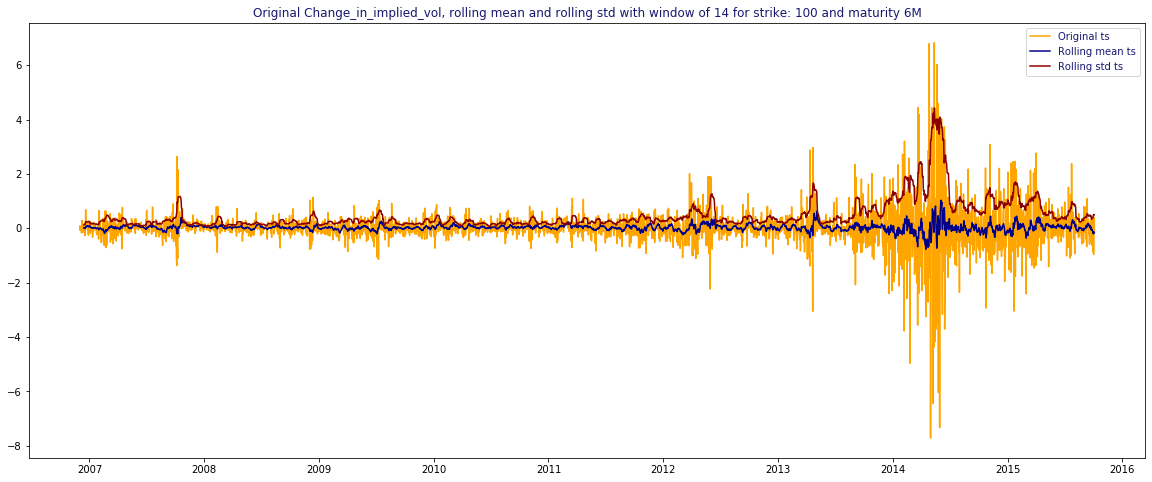

Rolling mean and std for maturity: 1Y and strike: 100


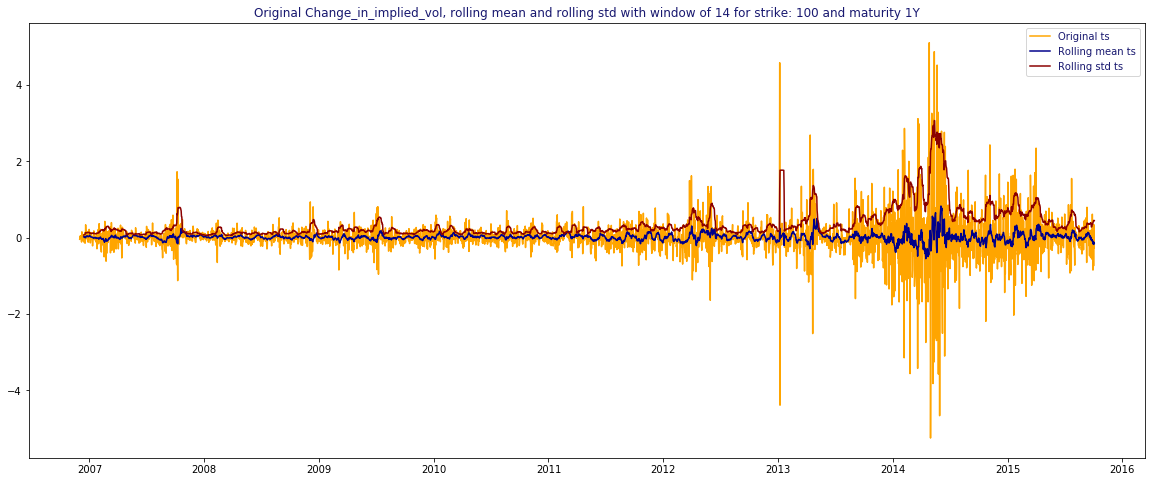

Rolling mean and std for maturity: 18M and strike: 100


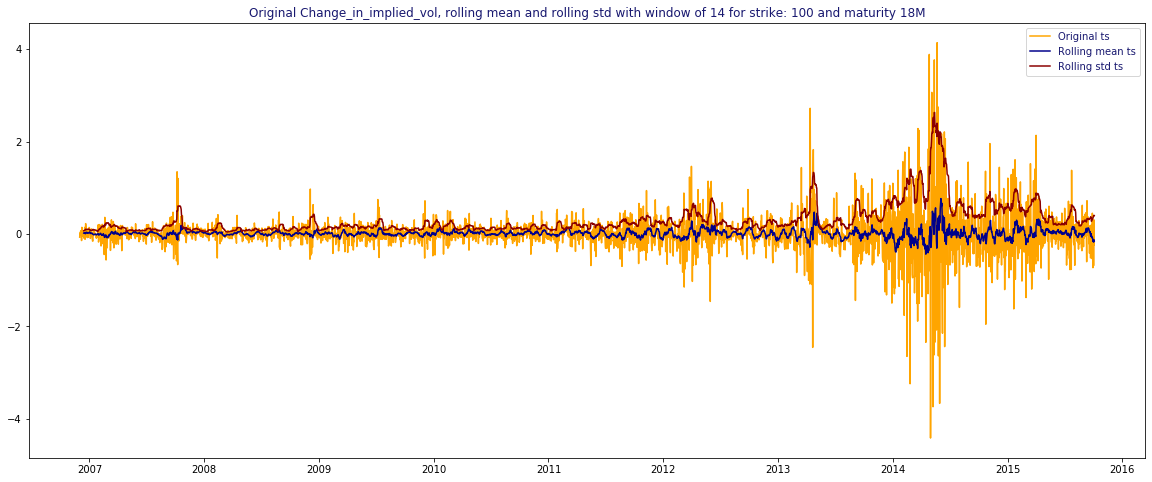

Rolling mean and std for maturity: 2Y and strike: 100


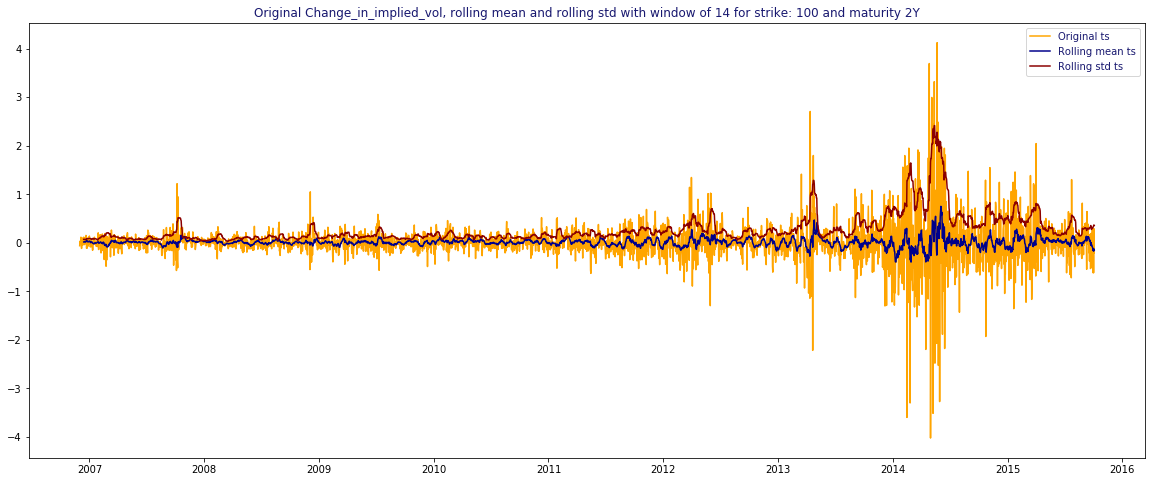

Rolling mean and std for maturity: 3Y and strike: 100


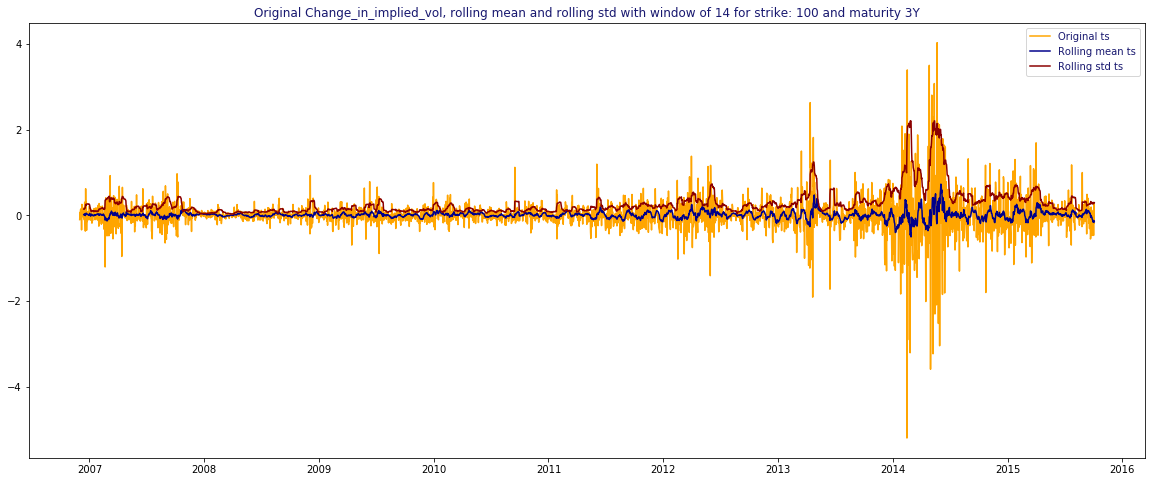

Rolling mean and std for maturity: 6M and strike: 110


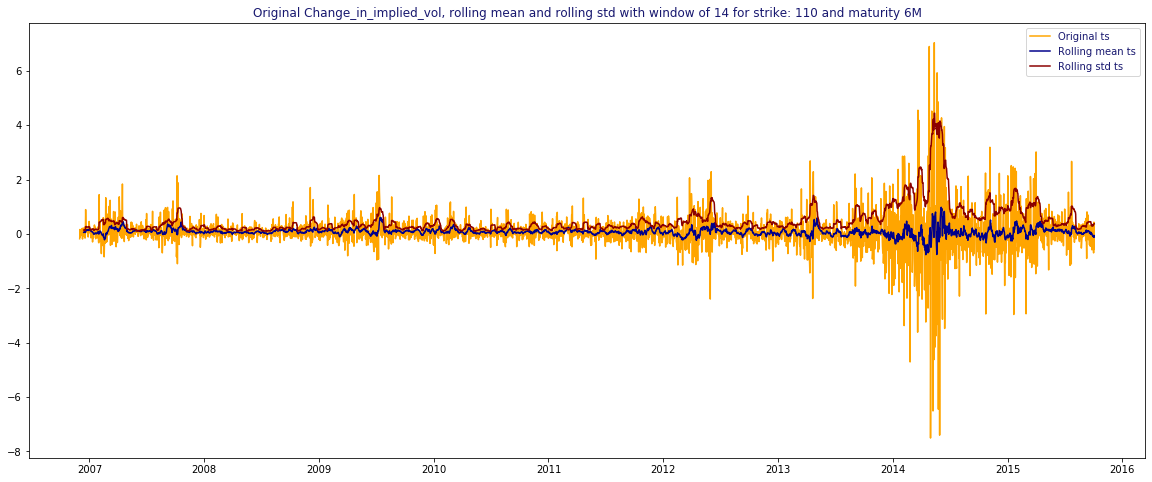

Rolling mean and std for maturity: 1Y and strike: 110


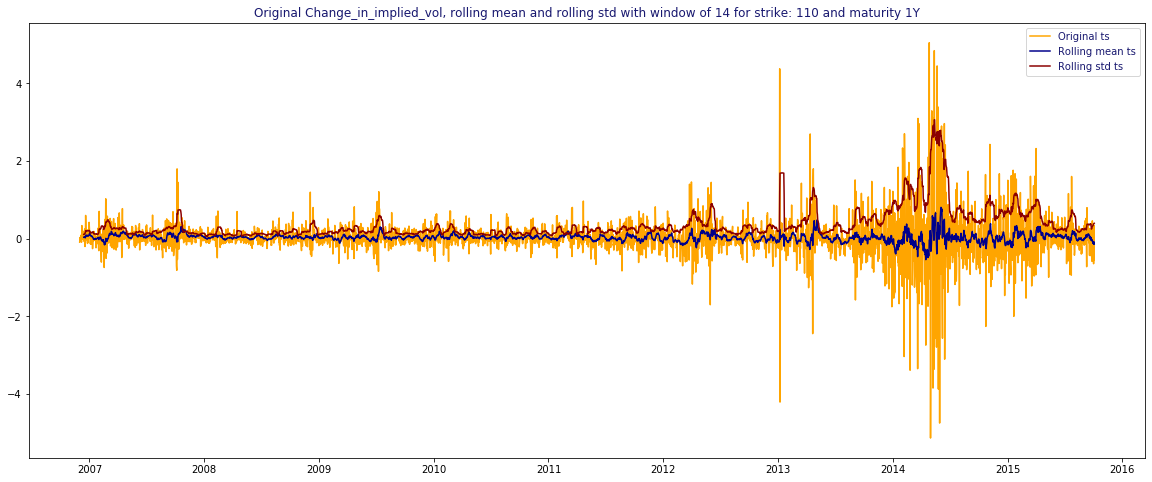

Rolling mean and std for maturity: 18M and strike: 110


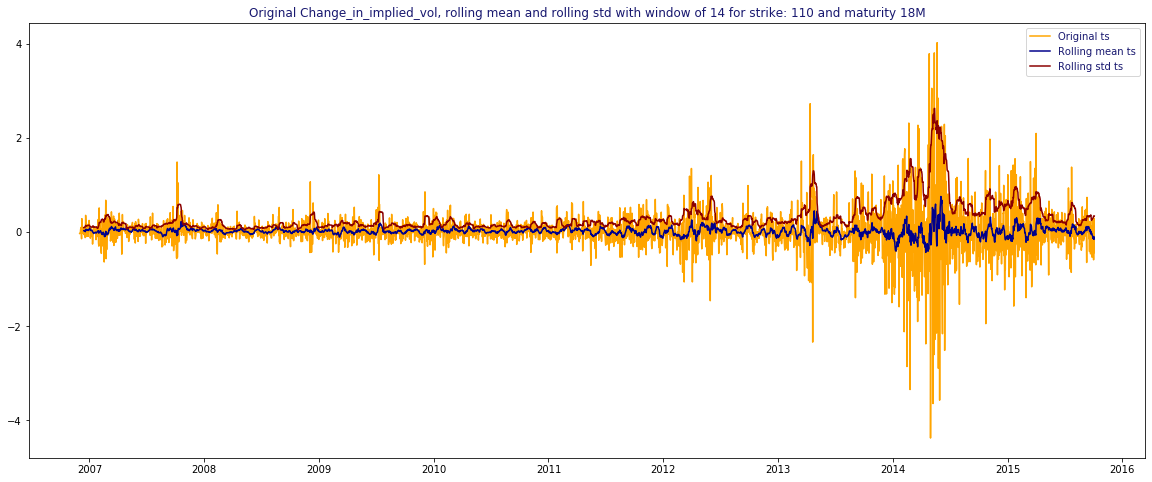

Rolling mean and std for maturity: 2Y and strike: 110


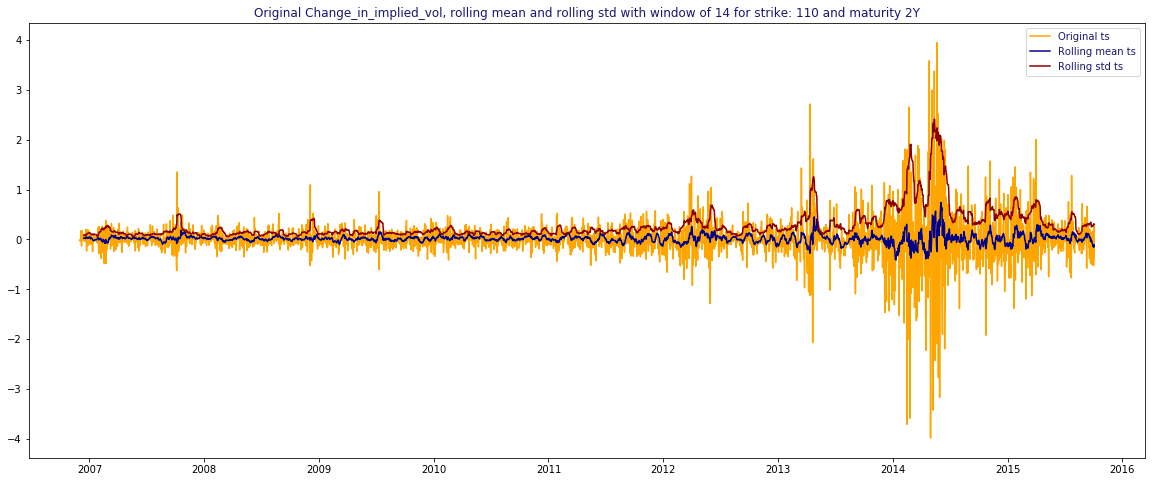

Rolling mean and std for maturity: 3Y and strike: 110


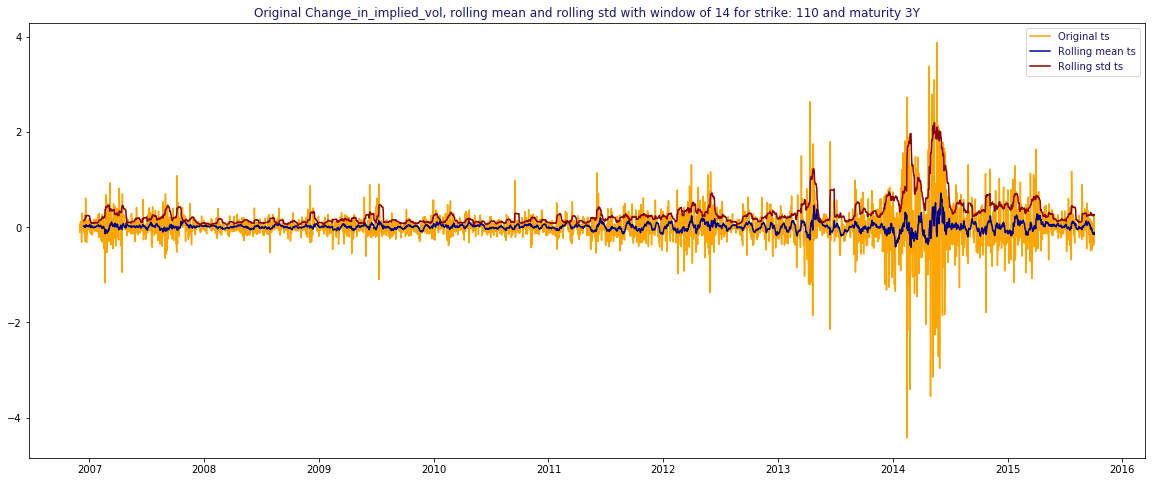

Rolling mean and std for maturity: 6M and strike: 120


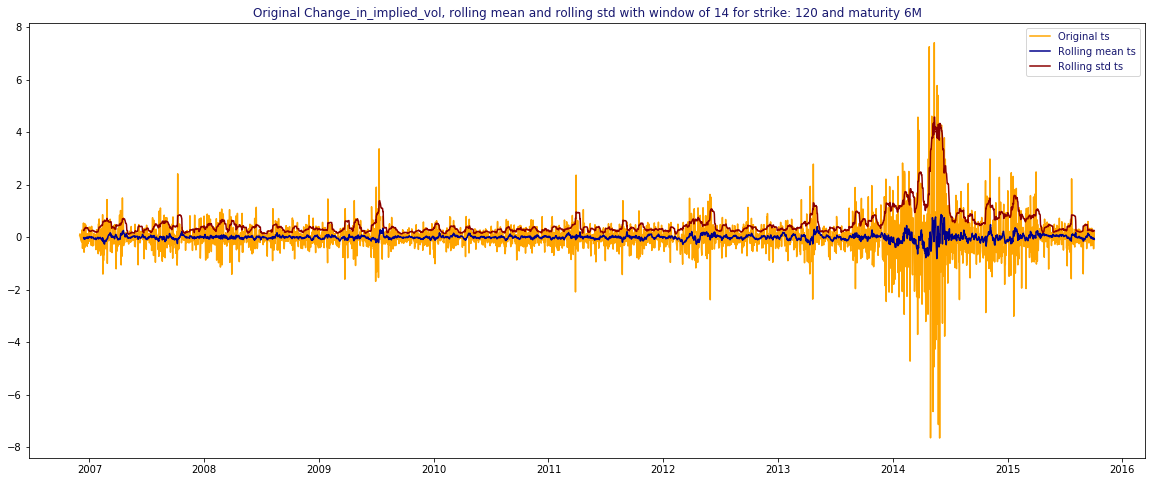

Rolling mean and std for maturity: 1Y and strike: 120


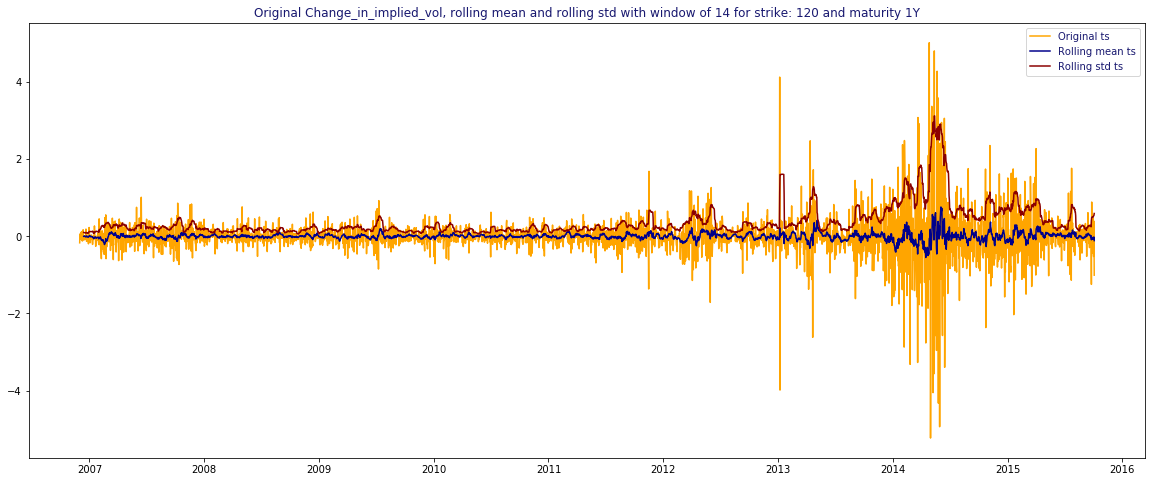

Rolling mean and std for maturity: 18M and strike: 120


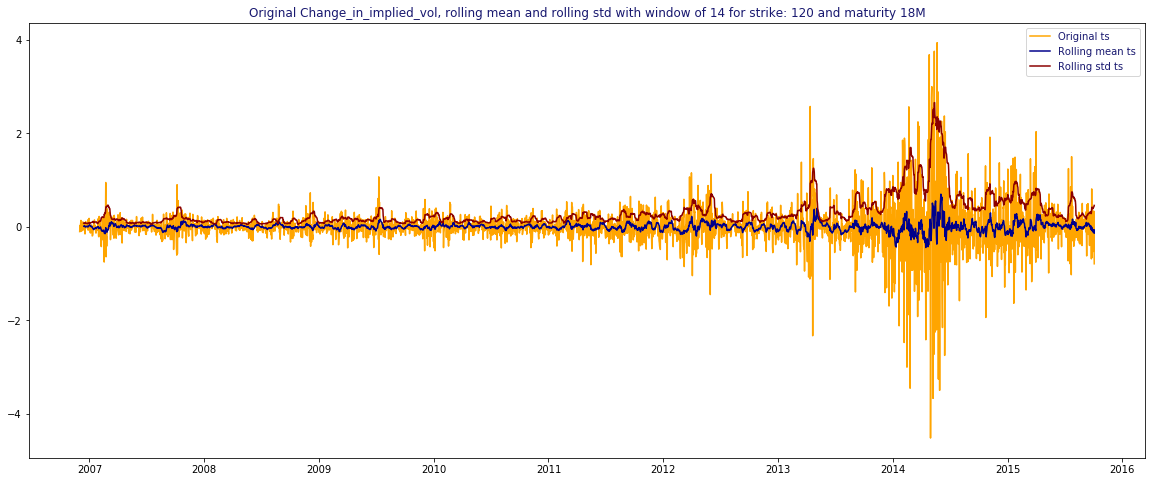

Rolling mean and std for maturity: 2Y and strike: 120


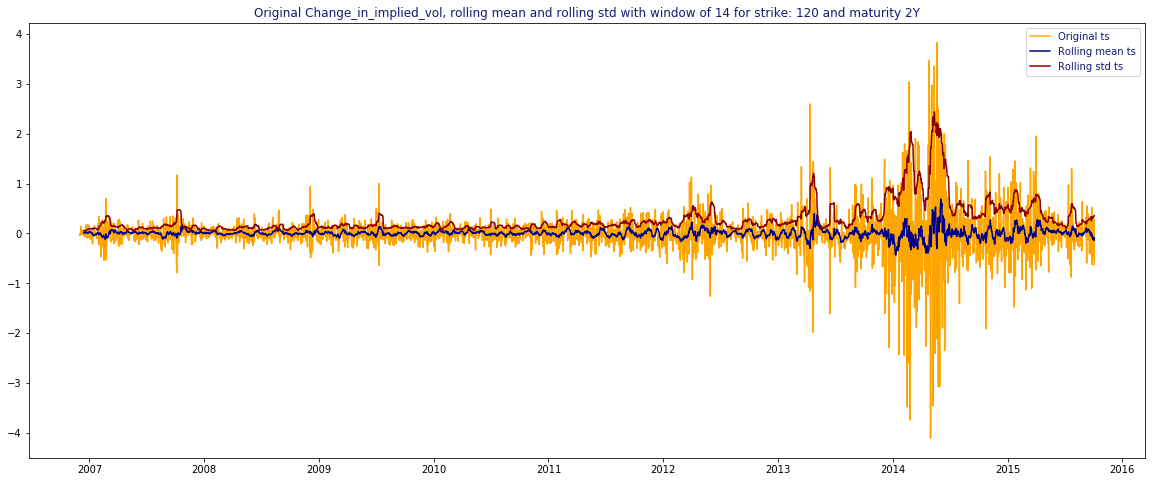

Rolling mean and std for maturity: 3Y and strike: 120


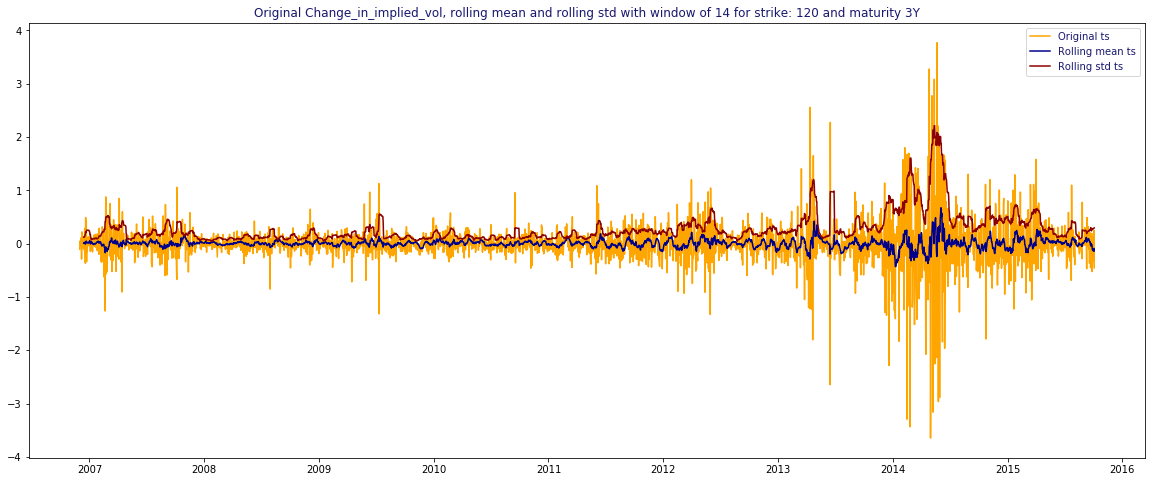

In [57]:
from src.ts_test import plot_rolling_averages

plot_rolling_averages(spx_daily, "Change_in_implied_vol", 14)

### EWMA - Exponentially Weighted Moving Average 

Value of alpha shows the weight for past values. Alpha in [0, 1] where values close to 1 give very reactive smoothers (if alpha == 1, only the last info counts) whereas low values of alpha smooth the values over time. 


EWMAt=λYt+(1−λ)EWMAt−1

In [58]:
from src.ts_test import plot_ewmas, ewma

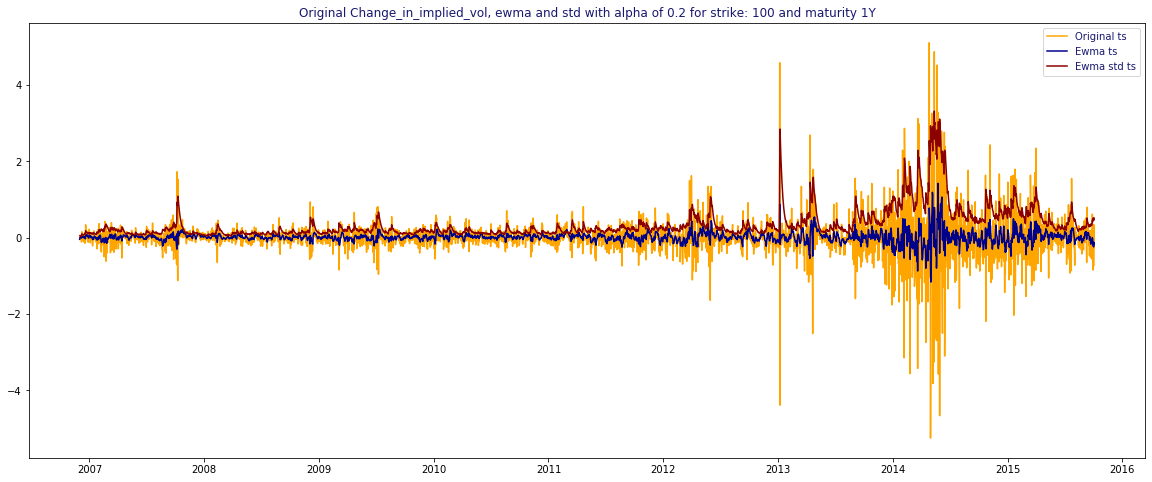

In [62]:
ewma(spx_daily_1Y_100, "Change_in_implied_vol", 0.2, 100, "1Y")

Rolling mean and std for maturity: 6M and strike: 40


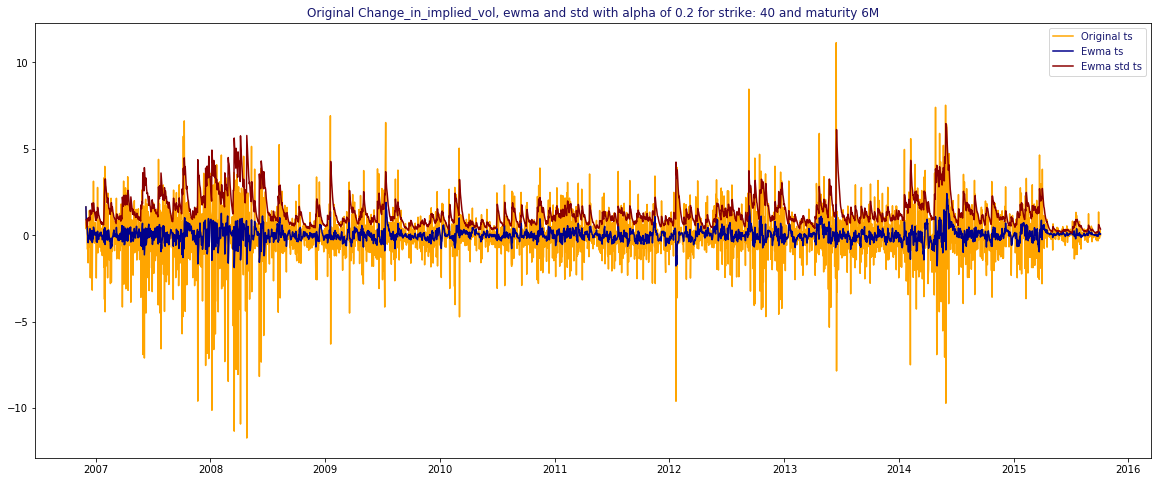

Rolling mean and std for maturity: 1Y and strike: 40


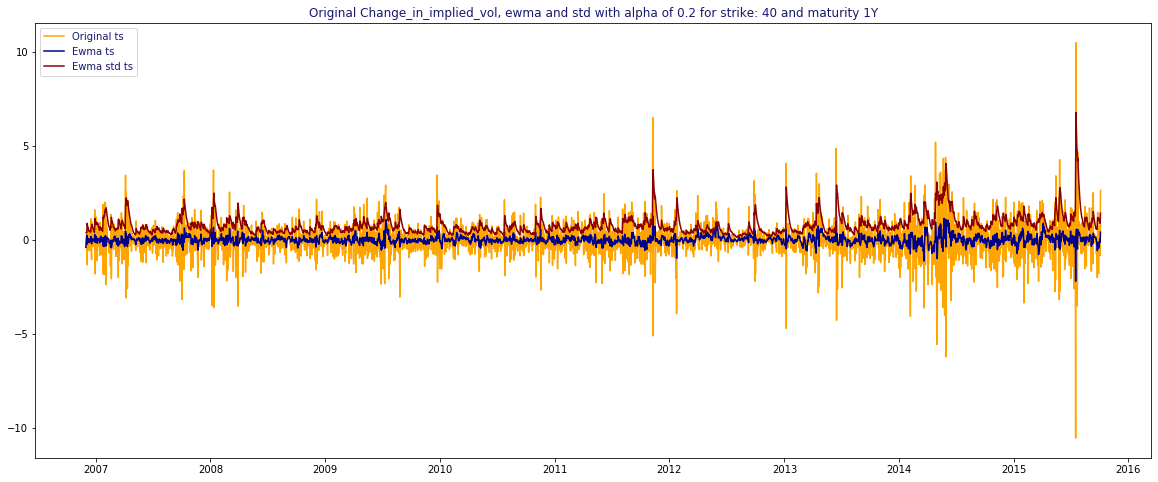

Rolling mean and std for maturity: 18M and strike: 40


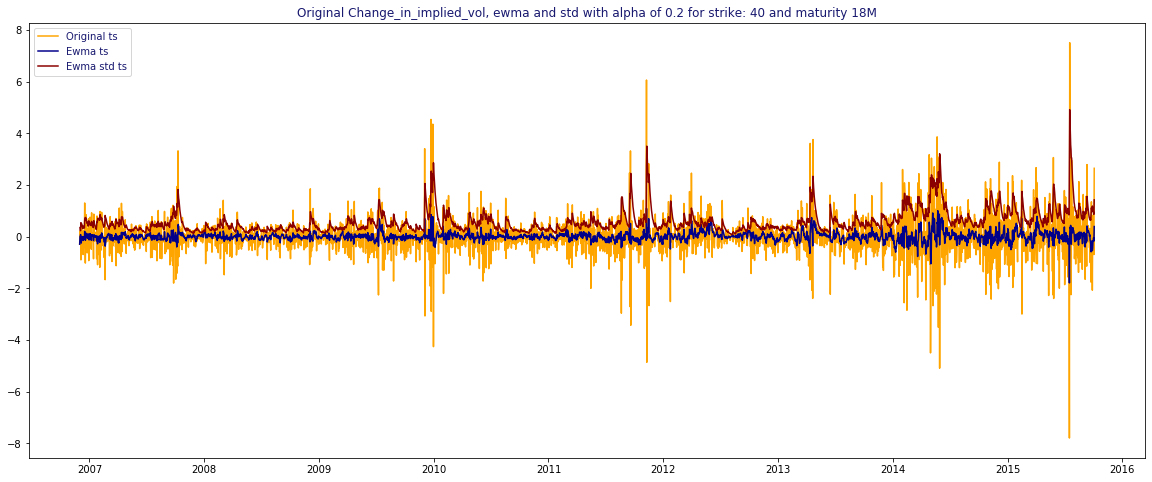

Rolling mean and std for maturity: 2Y and strike: 40


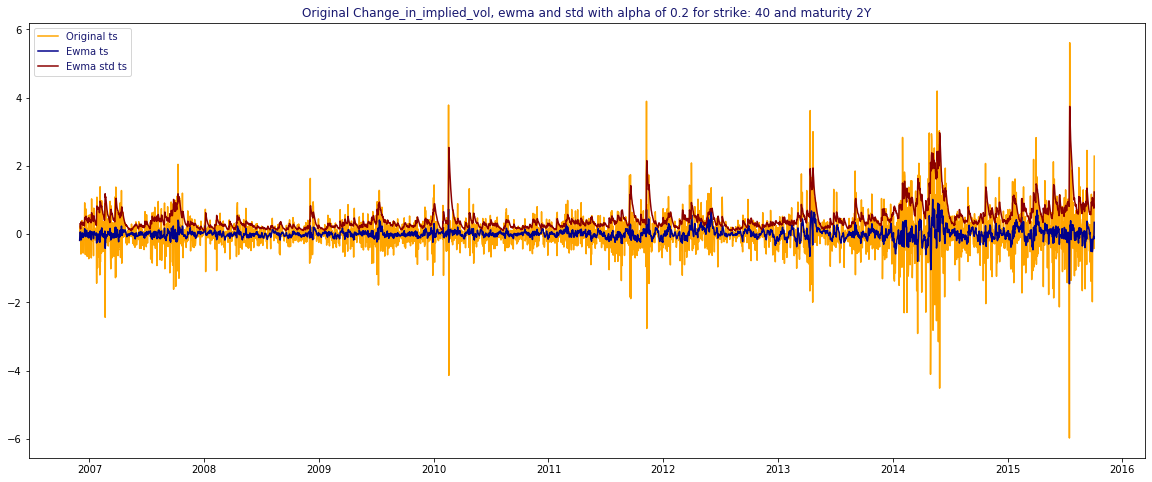

Rolling mean and std for maturity: 3Y and strike: 40


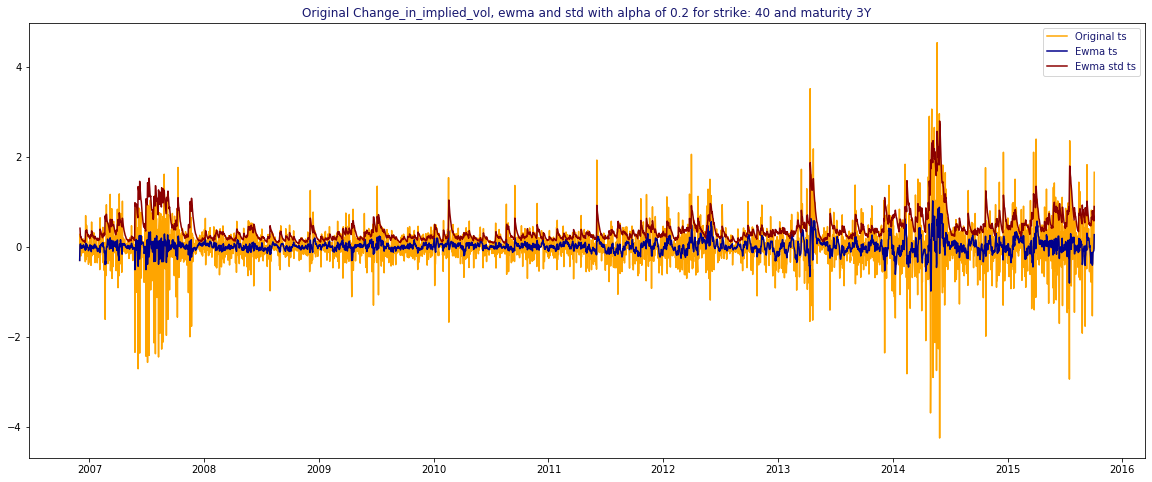

Rolling mean and std for maturity: 6M and strike: 60


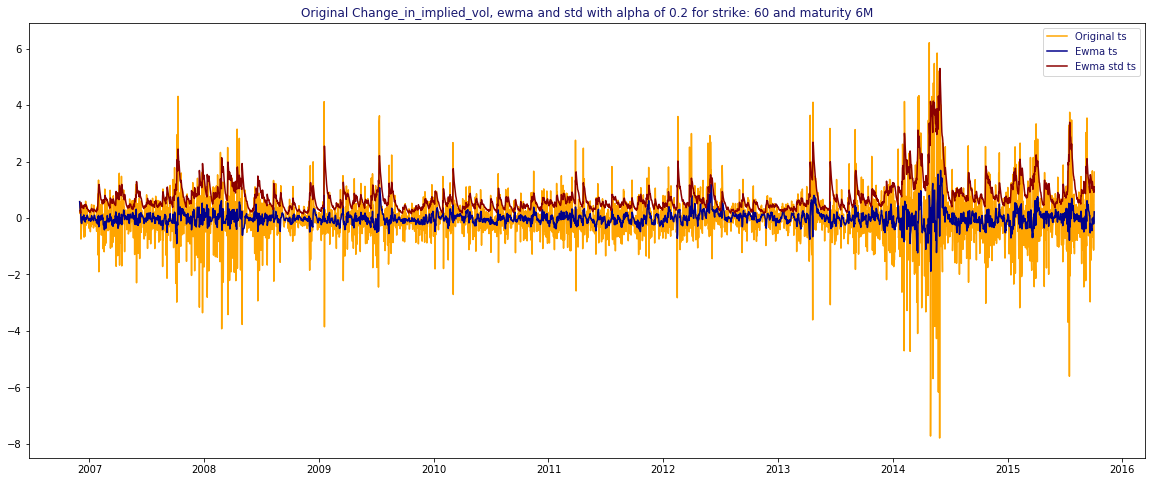

Rolling mean and std for maturity: 1Y and strike: 60


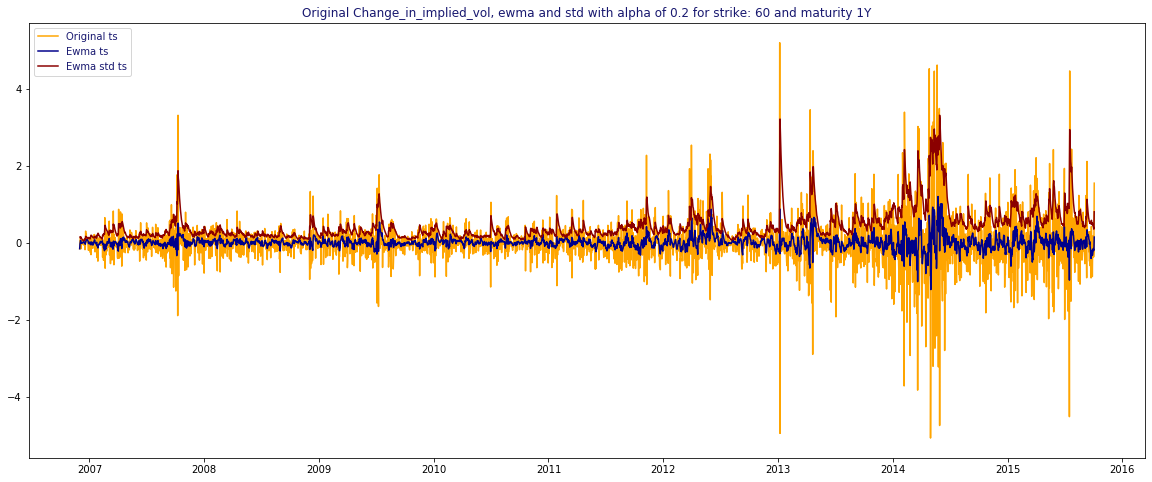

Rolling mean and std for maturity: 18M and strike: 60


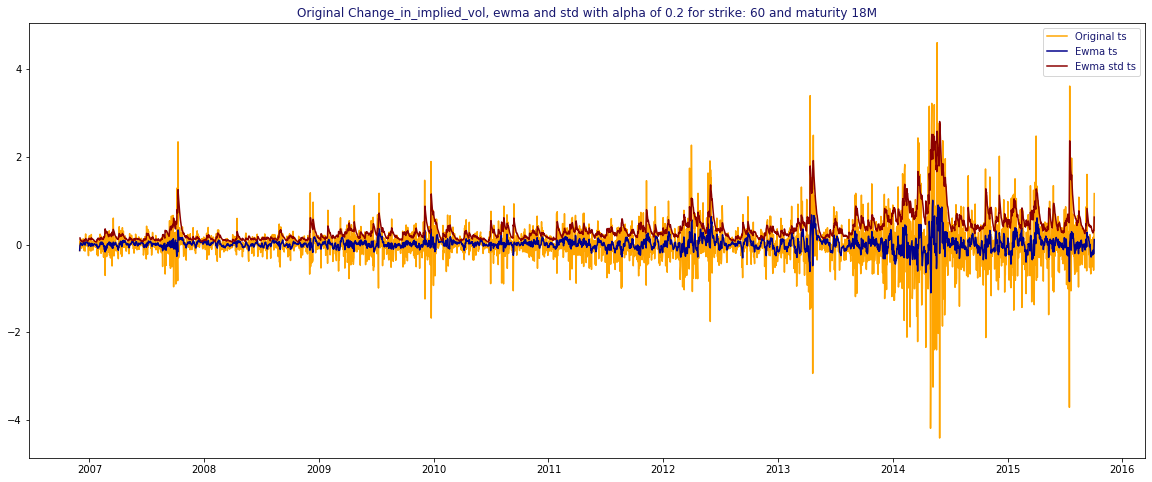

Rolling mean and std for maturity: 2Y and strike: 60


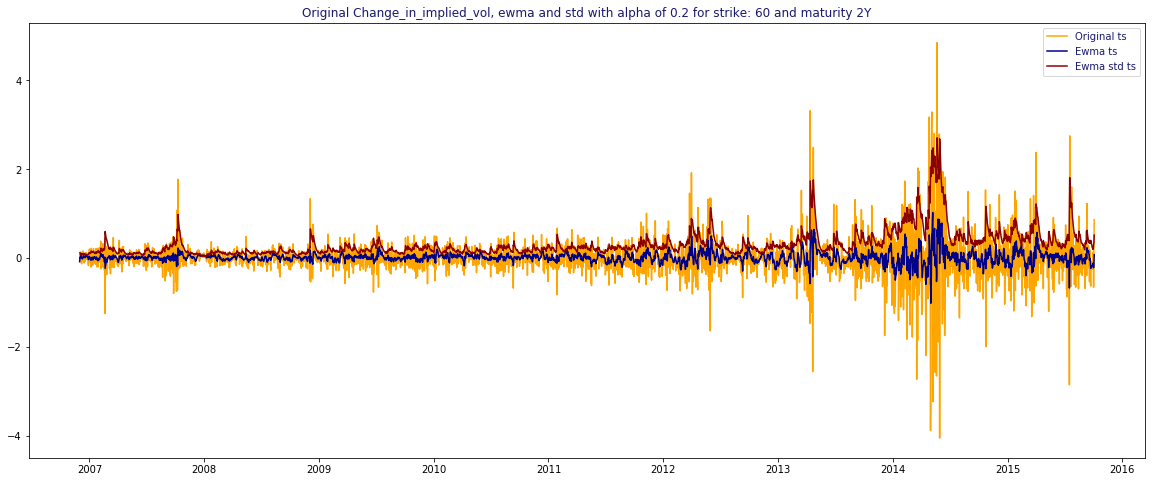

Rolling mean and std for maturity: 3Y and strike: 60


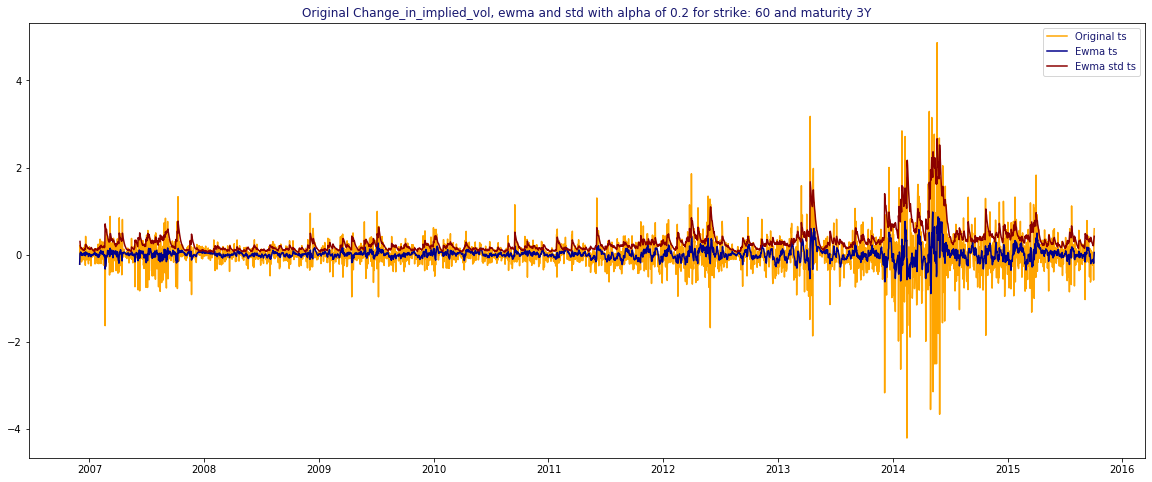

Rolling mean and std for maturity: 6M and strike: 80


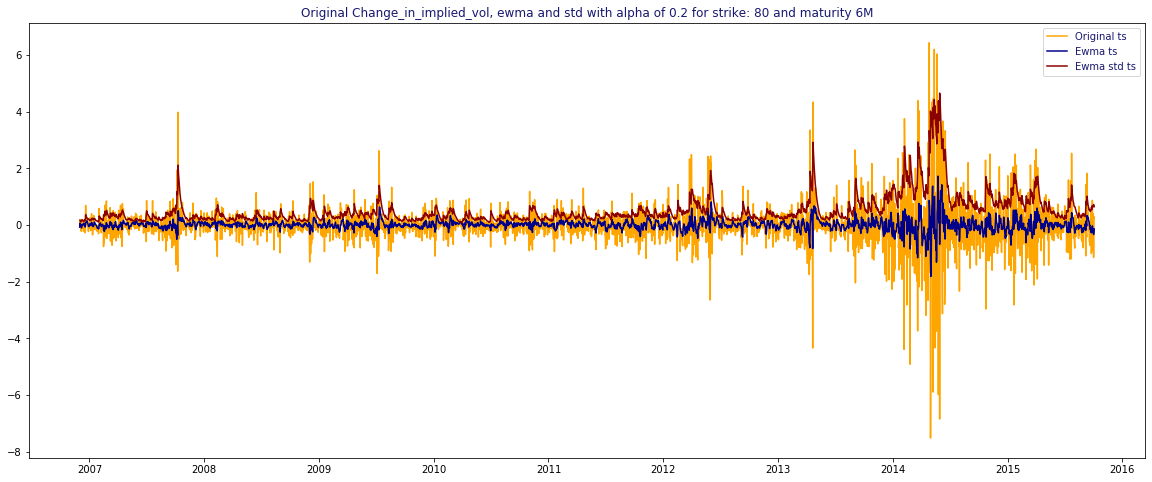

Rolling mean and std for maturity: 1Y and strike: 80


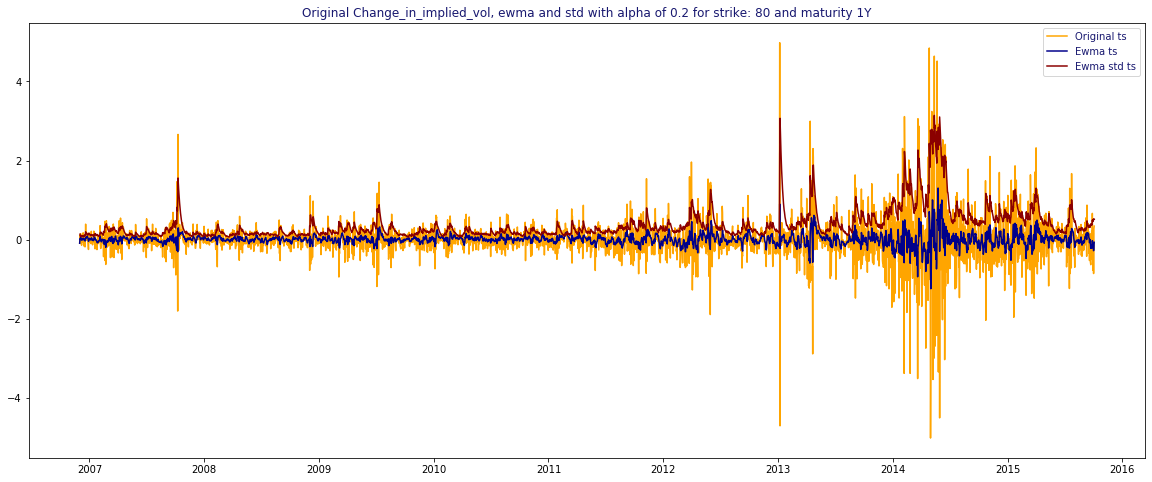

Rolling mean and std for maturity: 18M and strike: 80


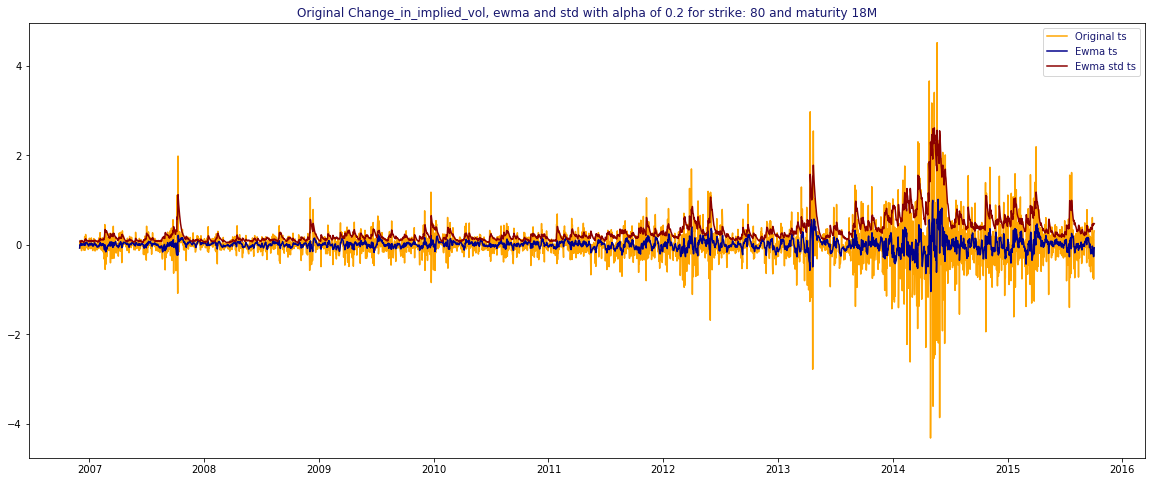

Rolling mean and std for maturity: 2Y and strike: 80


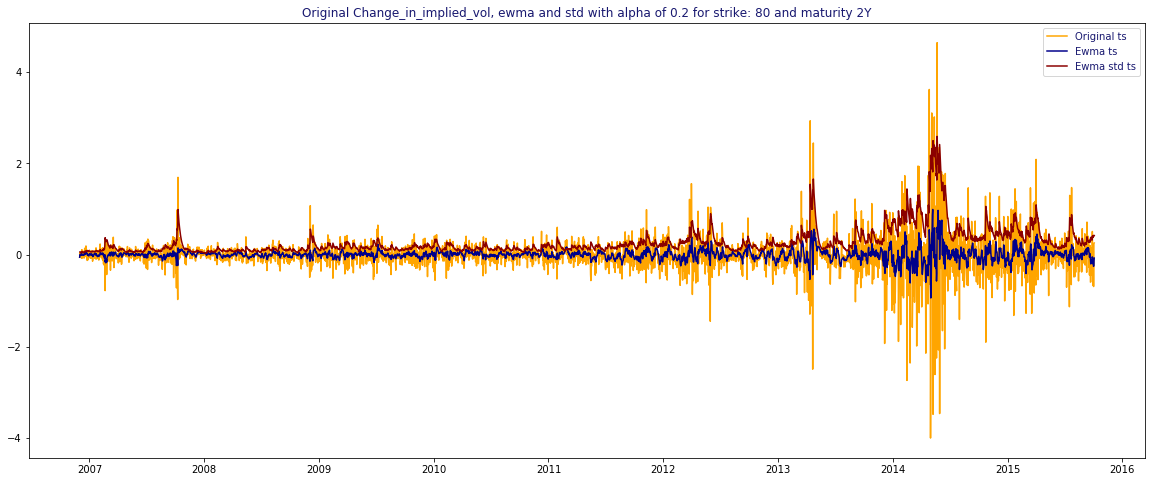

Rolling mean and std for maturity: 3Y and strike: 80


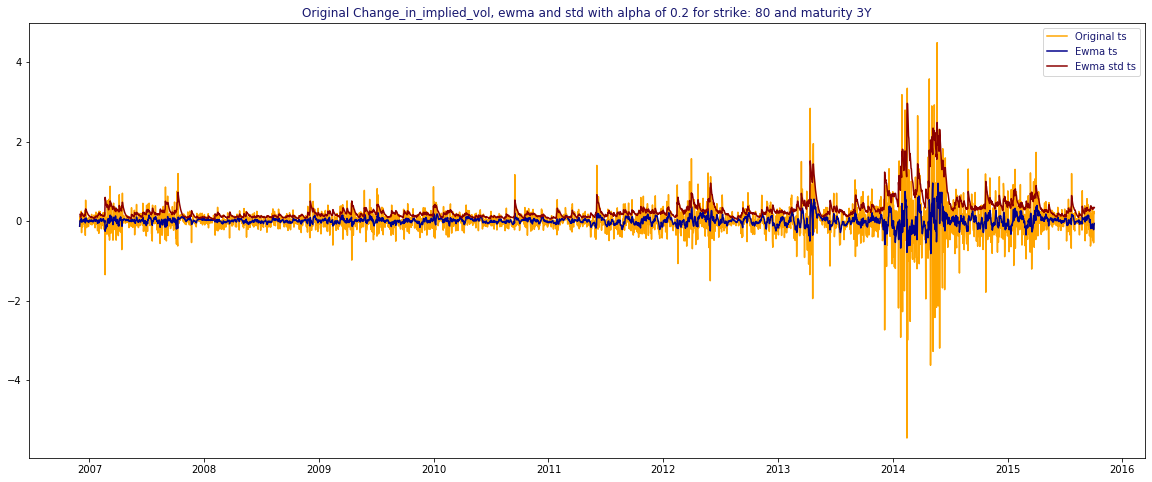

Rolling mean and std for maturity: 6M and strike: 90


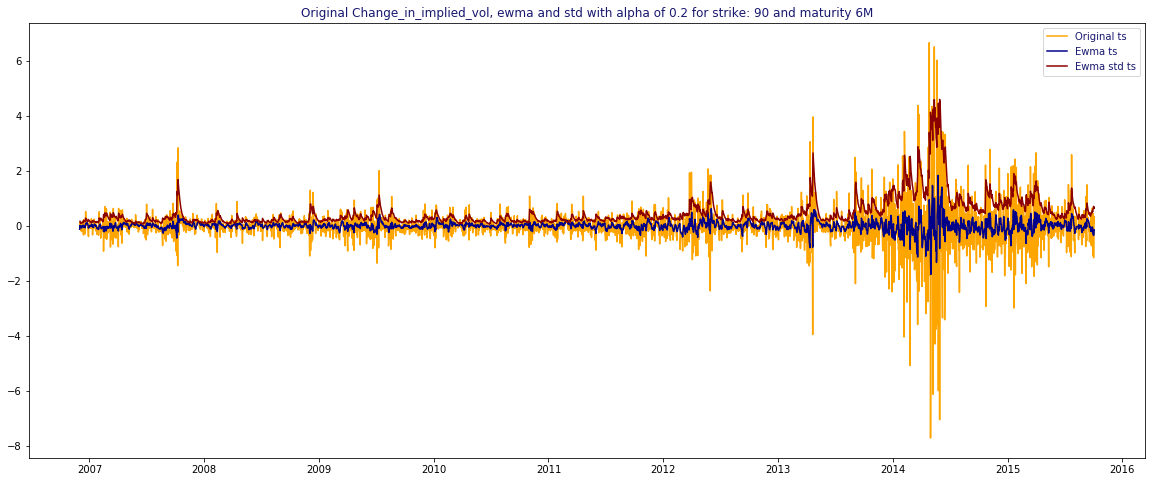

Rolling mean and std for maturity: 1Y and strike: 90


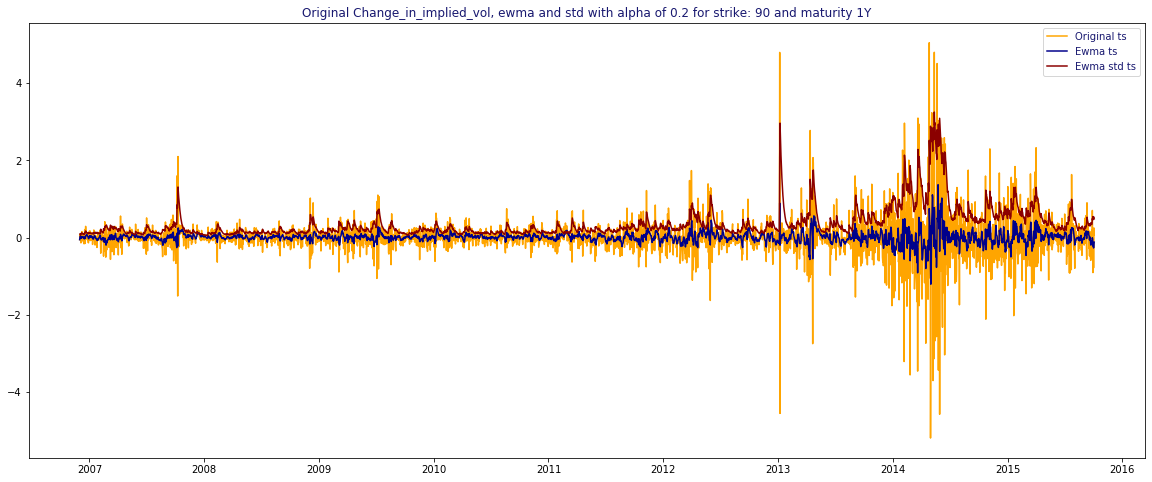

Rolling mean and std for maturity: 18M and strike: 90


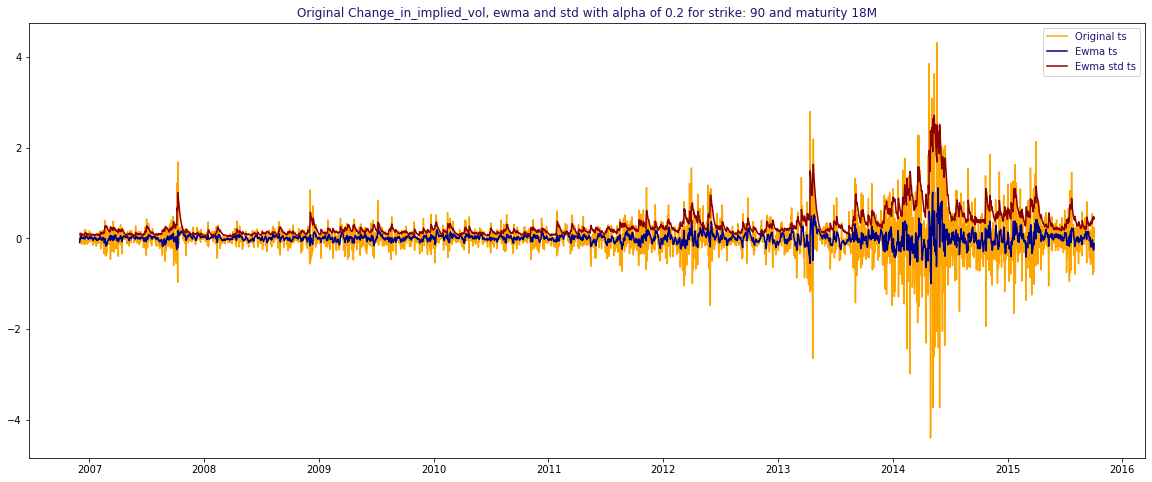

Rolling mean and std for maturity: 2Y and strike: 90


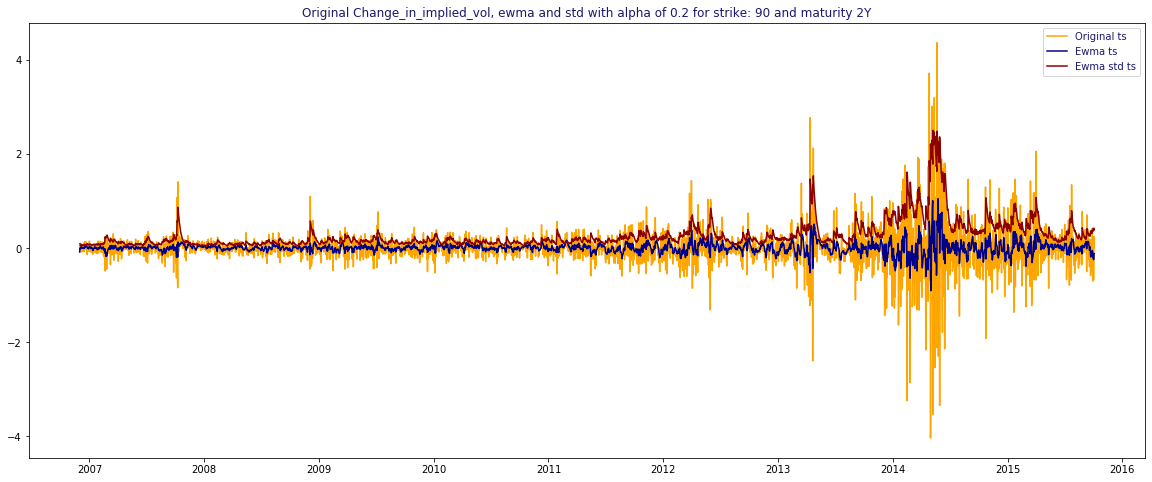

Rolling mean and std for maturity: 3Y and strike: 90


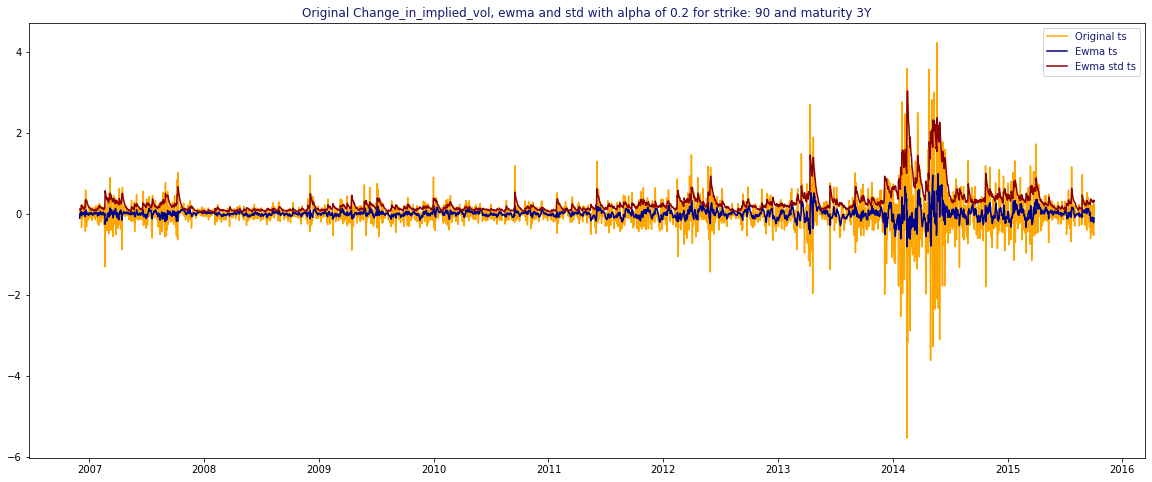

Rolling mean and std for maturity: 6M and strike: 100


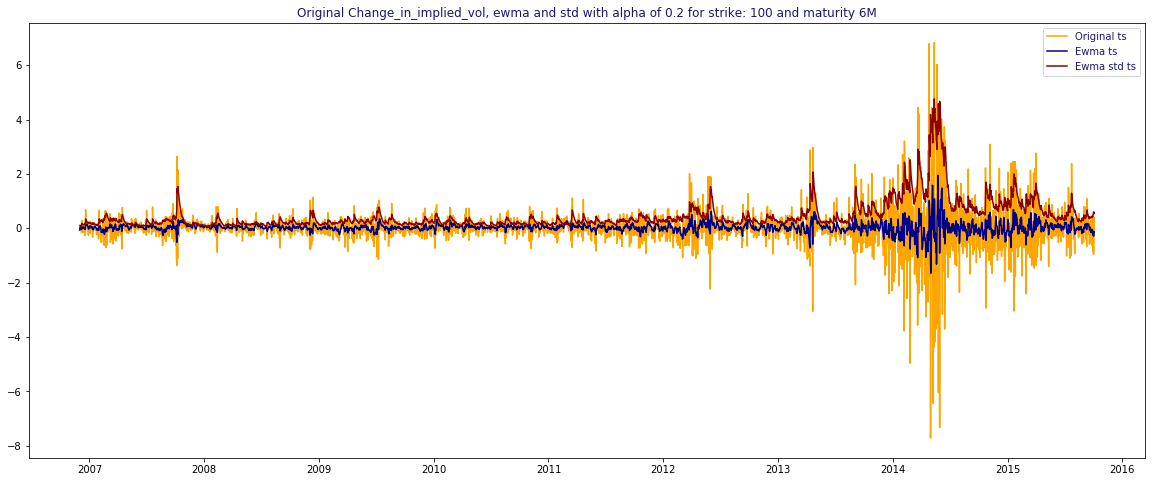

Rolling mean and std for maturity: 1Y and strike: 100


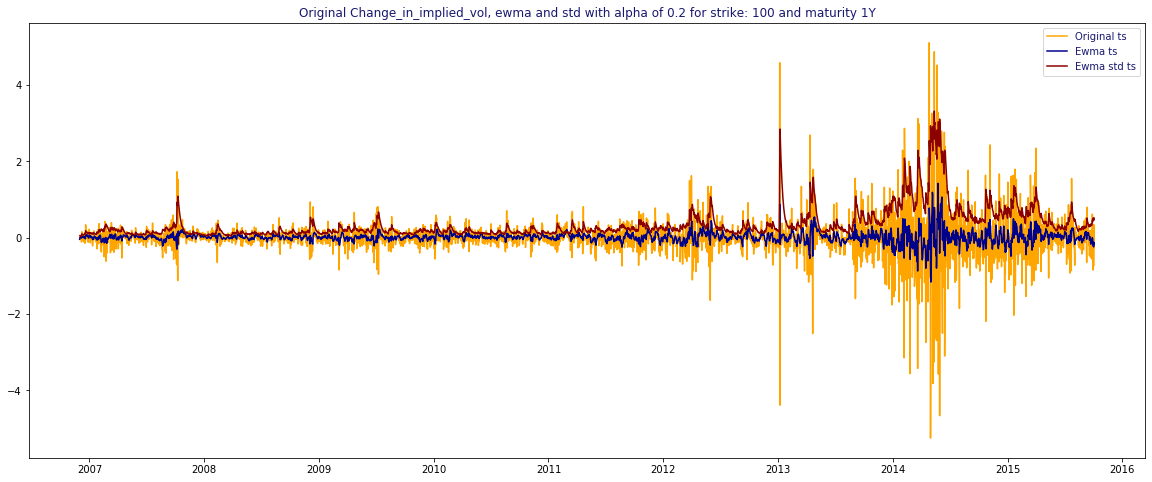

Rolling mean and std for maturity: 18M and strike: 100


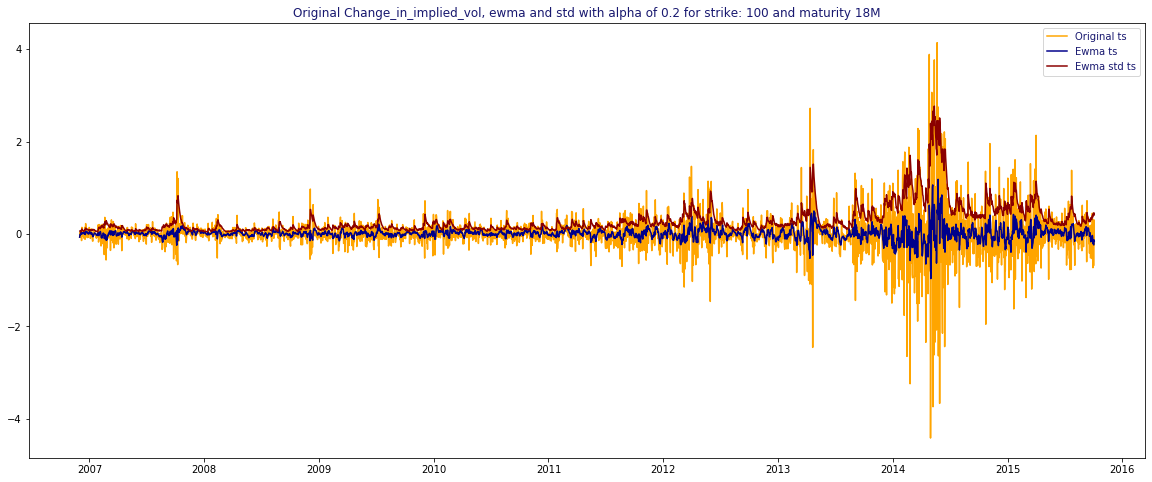

Rolling mean and std for maturity: 2Y and strike: 100


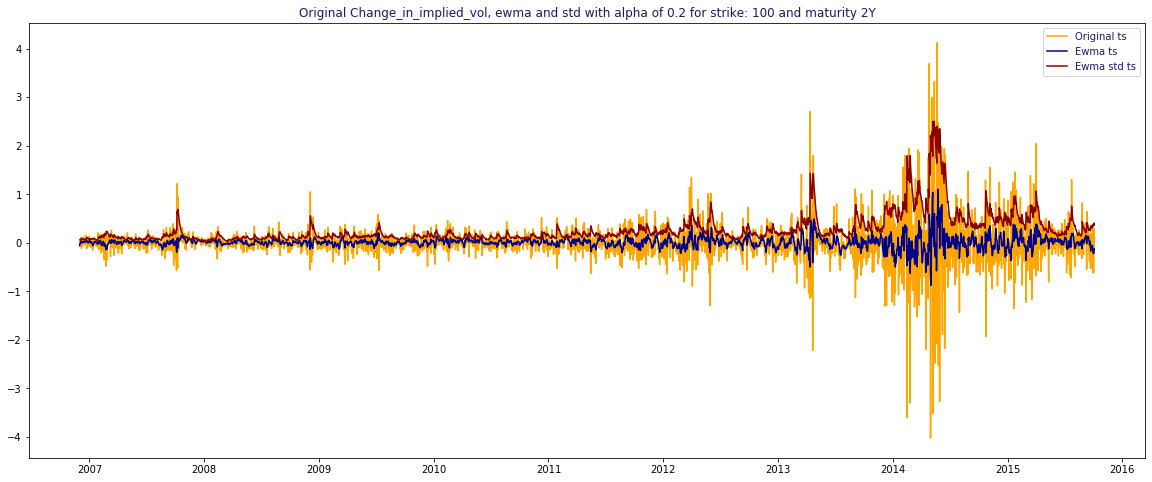

Rolling mean and std for maturity: 3Y and strike: 100


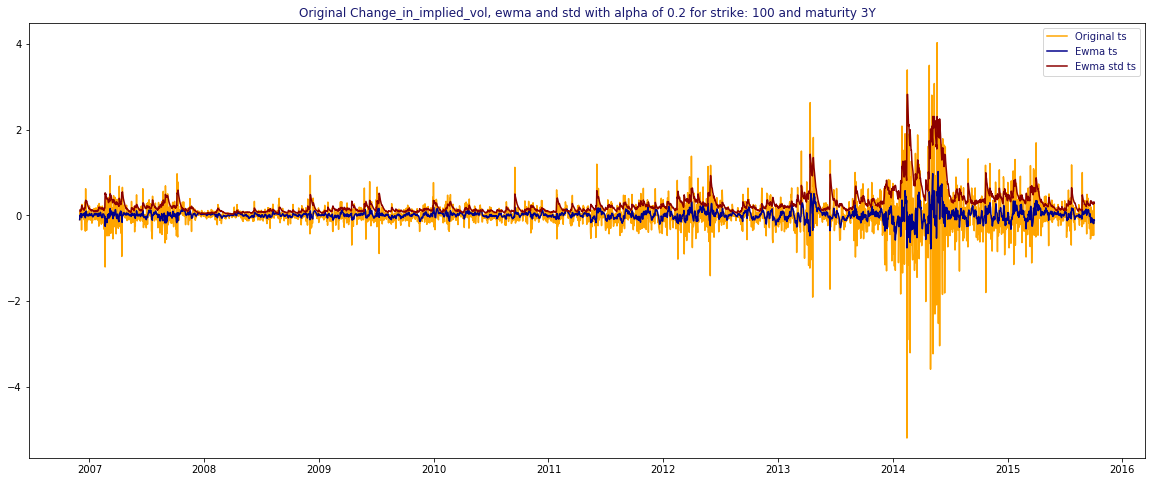

Rolling mean and std for maturity: 6M and strike: 110


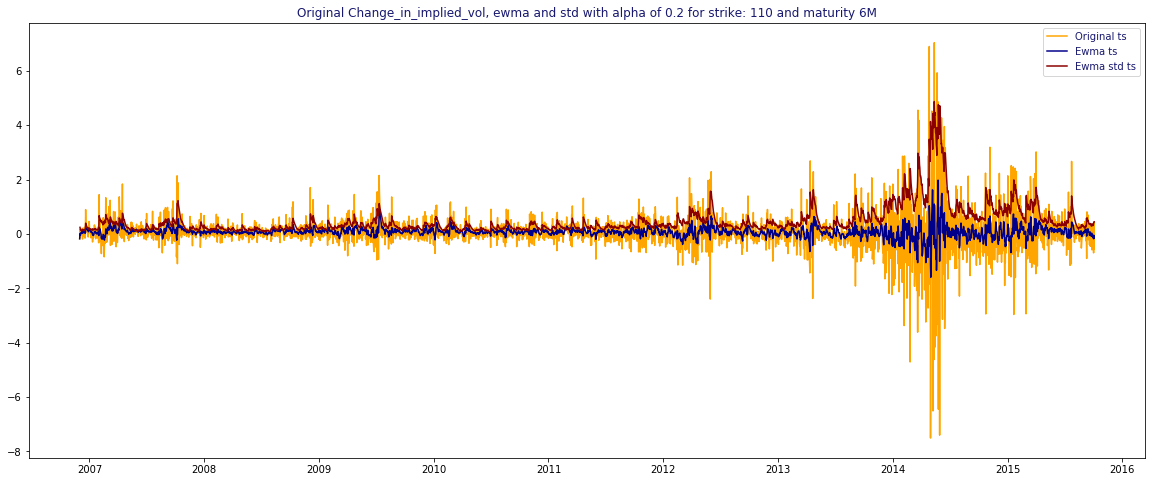

Rolling mean and std for maturity: 1Y and strike: 110


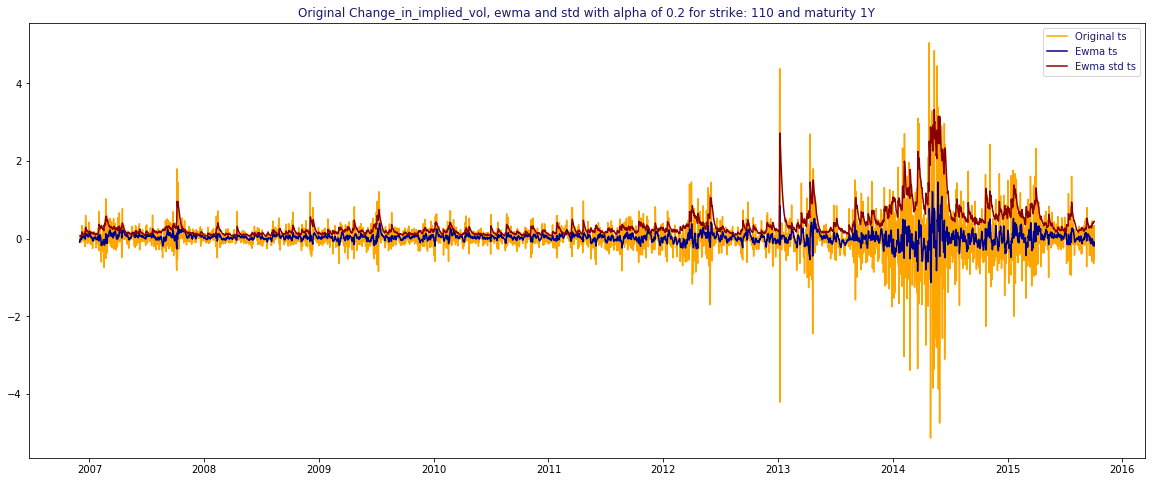

Rolling mean and std for maturity: 18M and strike: 110


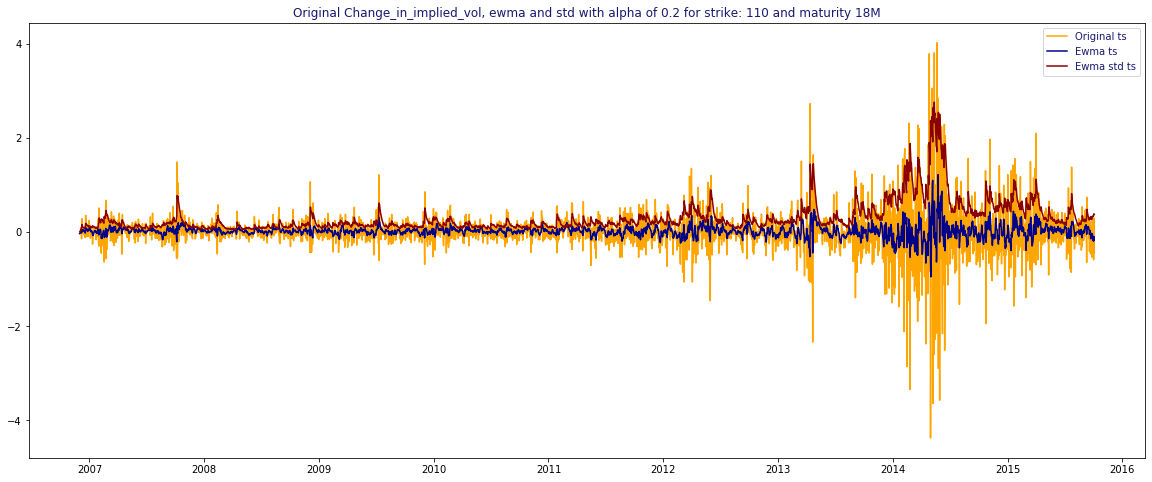

Rolling mean and std for maturity: 2Y and strike: 110


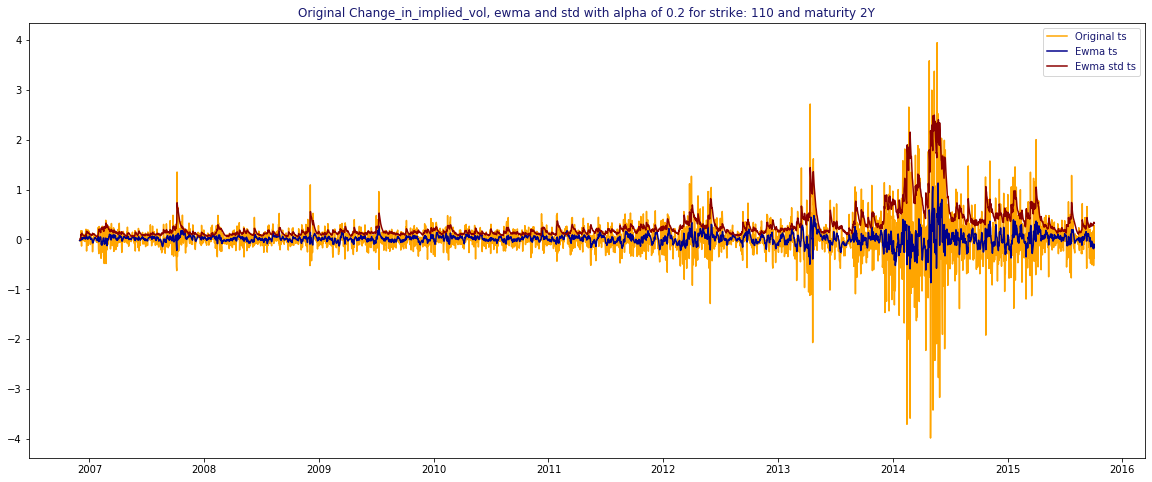

Rolling mean and std for maturity: 3Y and strike: 110


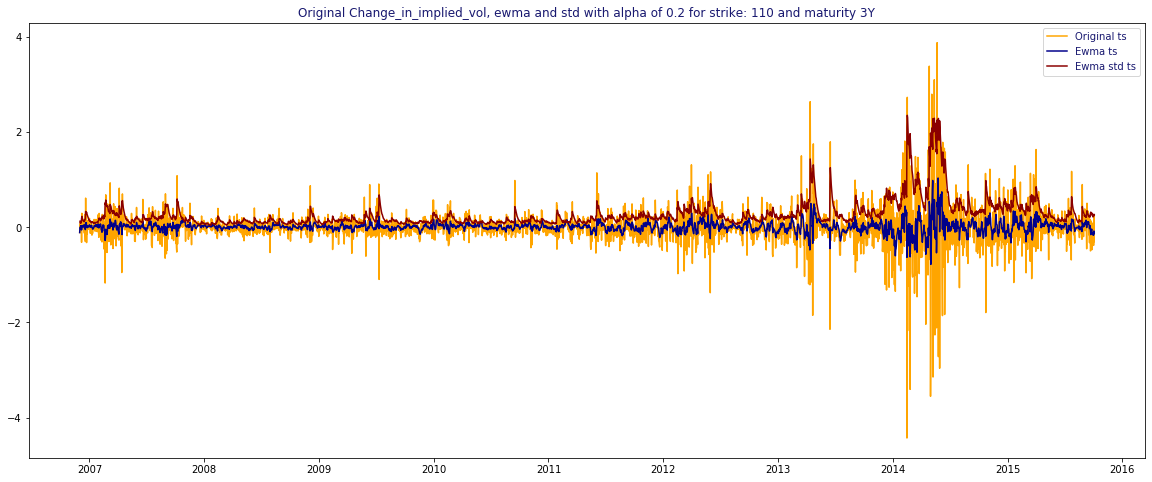

Rolling mean and std for maturity: 6M and strike: 120


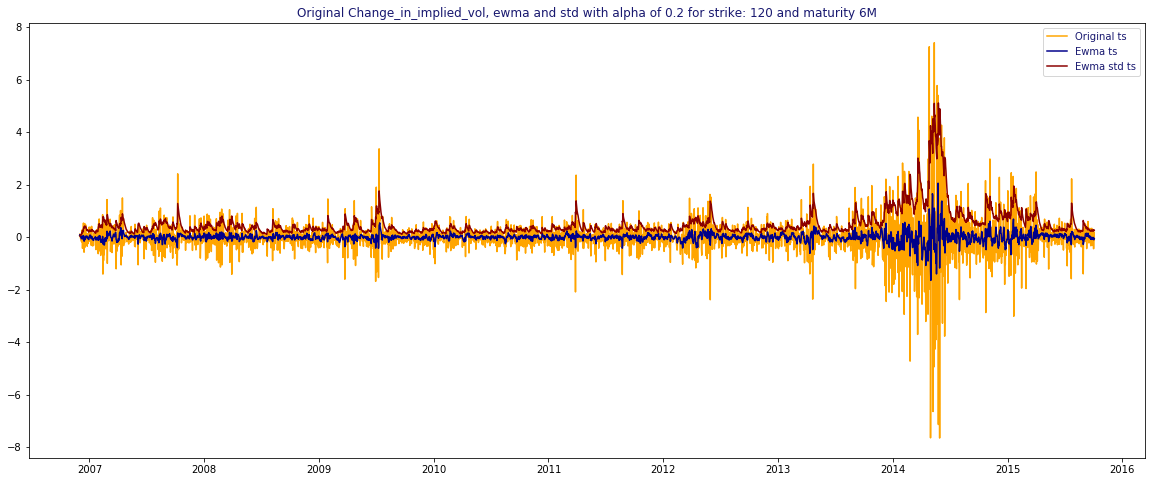

Rolling mean and std for maturity: 1Y and strike: 120


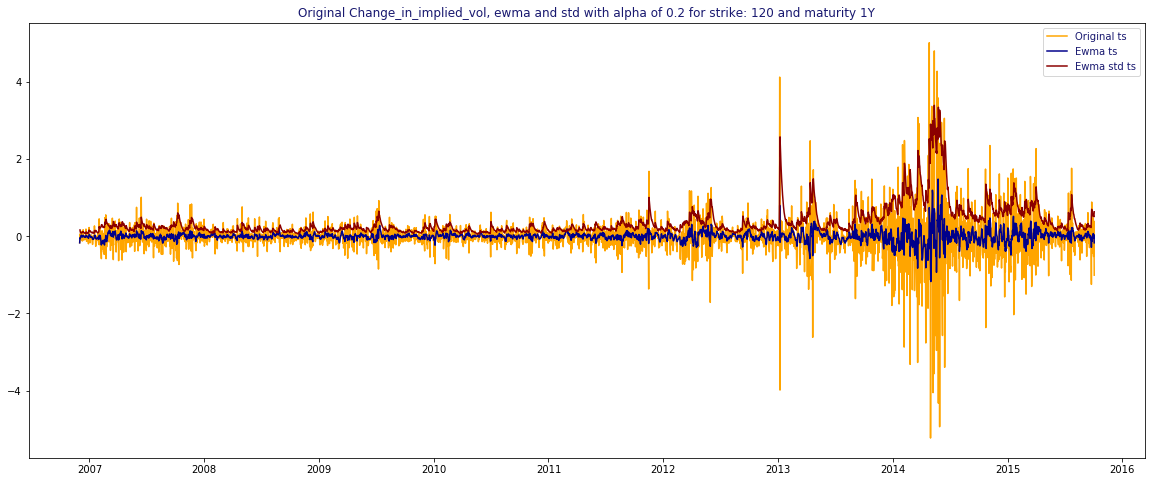

Rolling mean and std for maturity: 18M and strike: 120


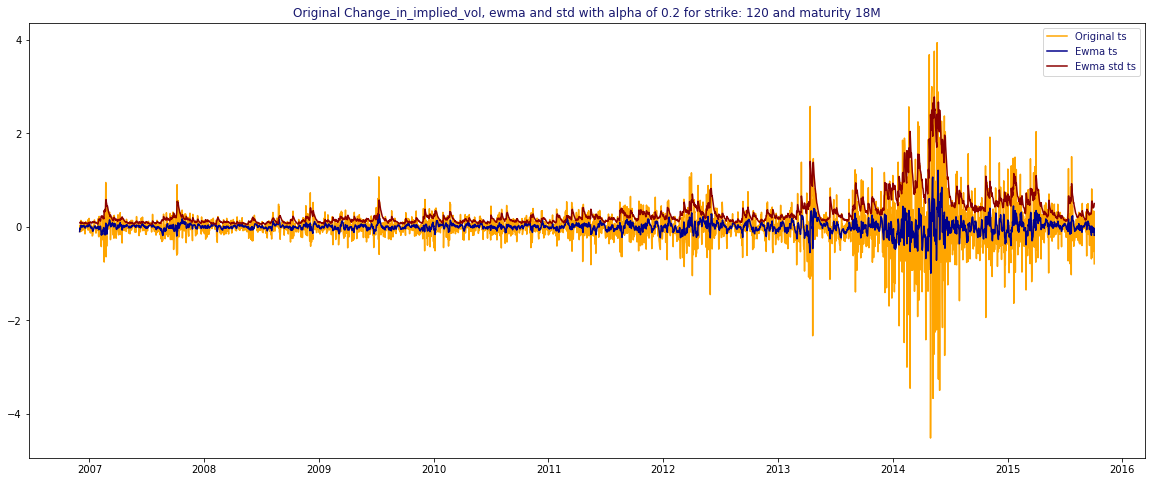

Rolling mean and std for maturity: 2Y and strike: 120


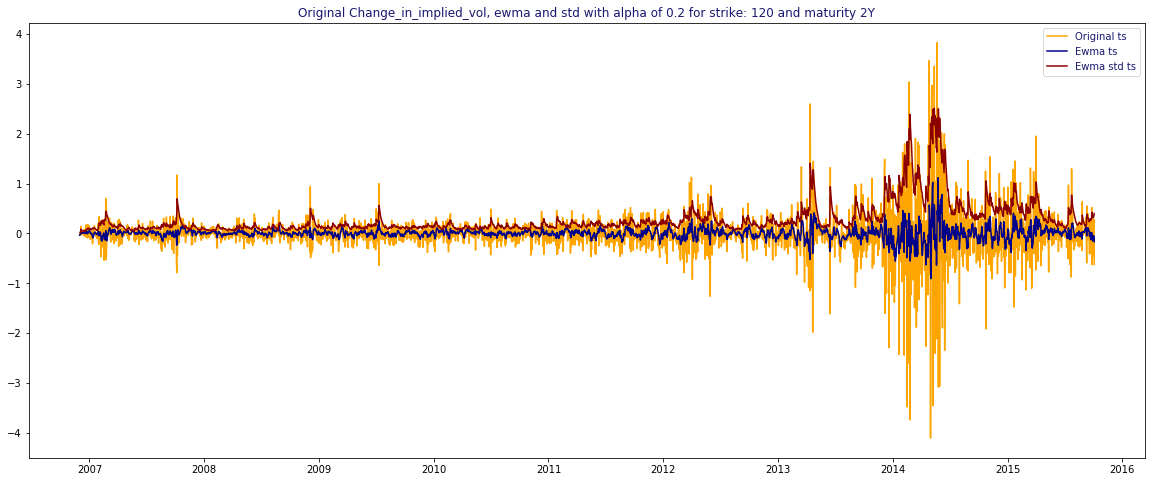

Rolling mean and std for maturity: 3Y and strike: 120


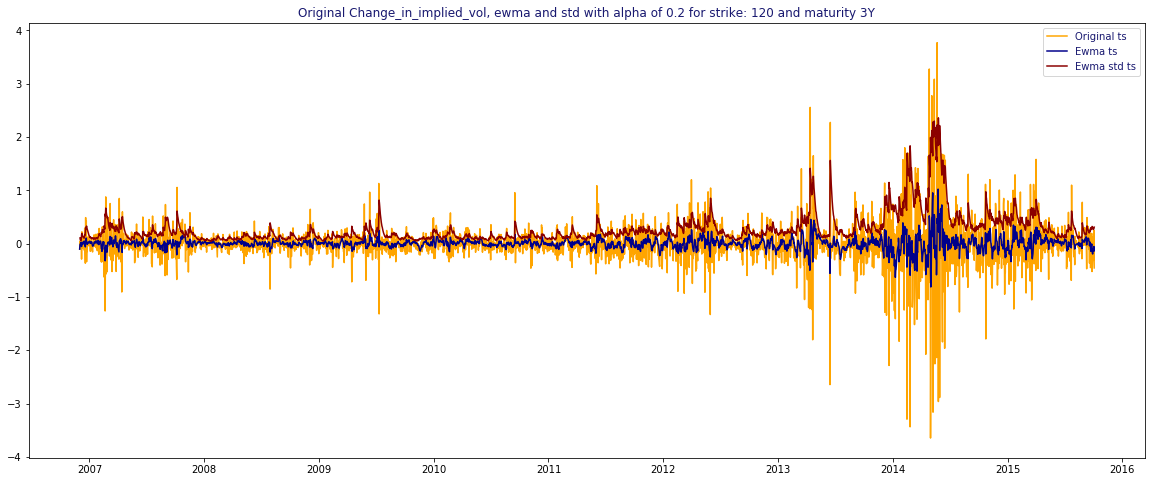

In [60]:
plot_ewmas(spx_daily, "Change_in_implied_vol", 0.2)

### Conclusion: 
No clear trend even with exponential smoothing. Needs at least 2 weeks to smooth moving averages, and for ewma we need lower level of alphas. Data shows no clear trend or seasonality.

# Seasonal decomposition 

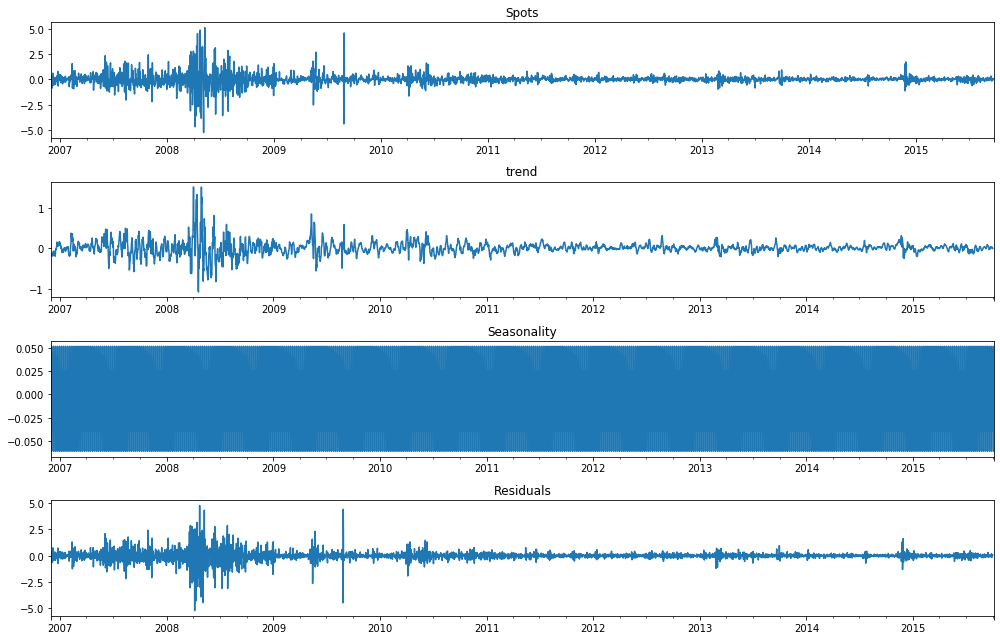

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose 

spx_daily_1Y_100 = spx_daily[(spx_daily.Strike == 100) & (spx_daily.Duration == "1Y")]

# First we need to transform the pd df to Series object with datetime index as tuples
spx_daily_1Y_100 = spx_daily_1Y_100.set_index("Dates")
spx_daily_1Y_100.sort_index(inplace=True)
spx_daily_1Y_100.head()

# Datetime pd series with tuple date index 
spots = pd.Series(spx_daily_1Y_100["Change_in_implied_vol"].values, \
                 index = pd.DatetimeIndex(tuple(pd.date_range(start = "2006-12-01", \
                                                              periods=spx_daily_1Y_100.shape[0], freq = "D")), freq="D"))

spots_train, spots_test = spots[:-10], spots[-10:]

spots_decomposed = seasonal_decompose(spots)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,9))
spots_train.plot(ax=ax1)
spots_decomposed.trend.plot(ax=ax2)
spots_decomposed.seasonal.plot(ax=ax3)
spots_decomposed.resid.plot(ax=ax4)
ax1.set_title("Spots")
ax2.set_title("trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

###### Conclusion: 
No clear trend or seasonality. Residuals is very close to Spots.